In [1]:
%matplotlib widget 

import sys
sys.path.insert(0,'../')

from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator


In [2]:
def plot_2D_surface(x, y, z, title = None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, z,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('x (um)')
    ax.set_ylabel('s (m)')
    ax.set_zlabel('CSR_integrand')
    ax.set_box_aspect(aspect=None, zoom=0.8)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title:
        plt.title(title)
    plt.show()
    


In [3]:
def plot_2D_contour(x, y, z, title = None):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')

    if title:
        plt.title(title)

    plt.show()
   
    return ax

In [4]:
DtestCSR = CSR2D(input_file= 'input/chicane_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  = 0.1)

start reinterpolation. number of slice 1
t_x 1.0
t_z 1.0
xbins 500
zbins 500
Finish step 2 in 0.4812595844268799 seconds
Finish step 3 in 0.4677109718322754 seconds


In [5]:
DtestCSR.formation_length*1.5

2.0556983030969693

In [6]:
tan_theta = DtestCSR.beam._slope[0]
tan_theta

-0.07143002220736215

In [7]:
DtestCSR.beam.sigma_x

6.454962815261763e-05

In [8]:
DtestCSR.beam.slope

array([-7.14300222e-02, -9.18180514e-14])

In [9]:
DtestCSR.beam.sigma_x

6.454962815261763e-05

0.2


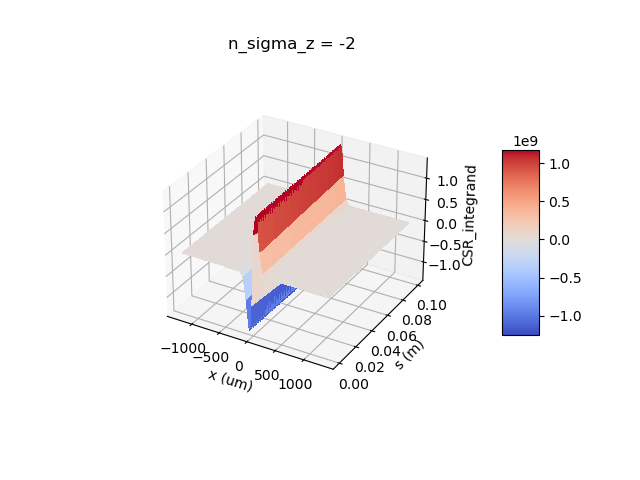

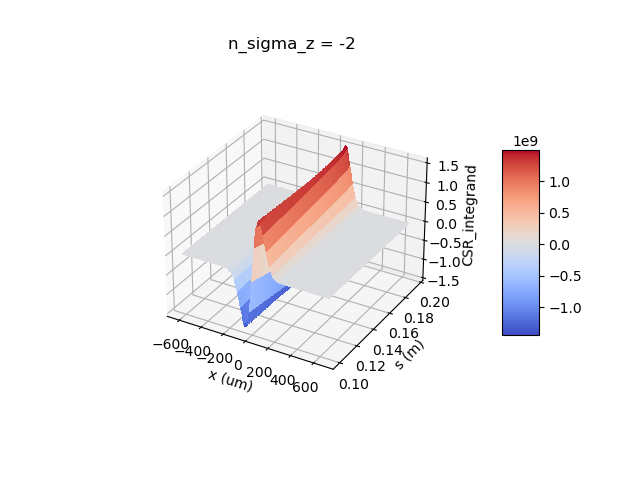

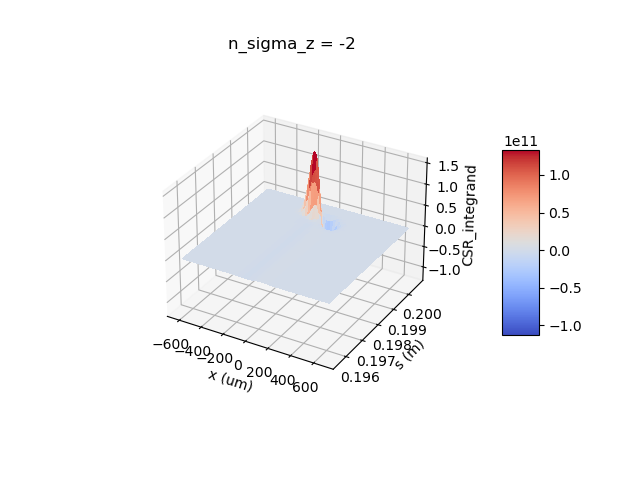

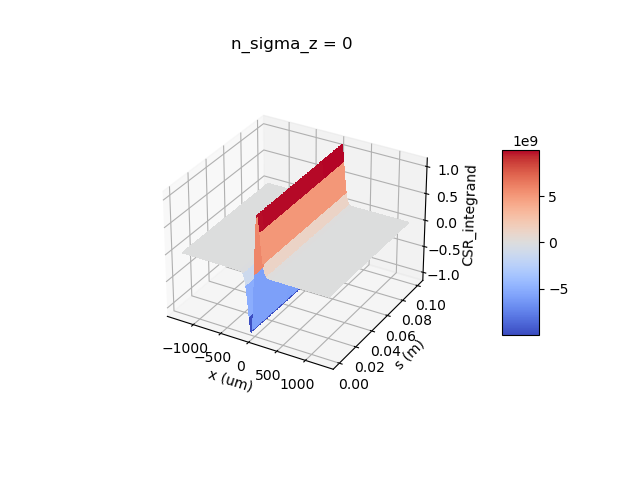

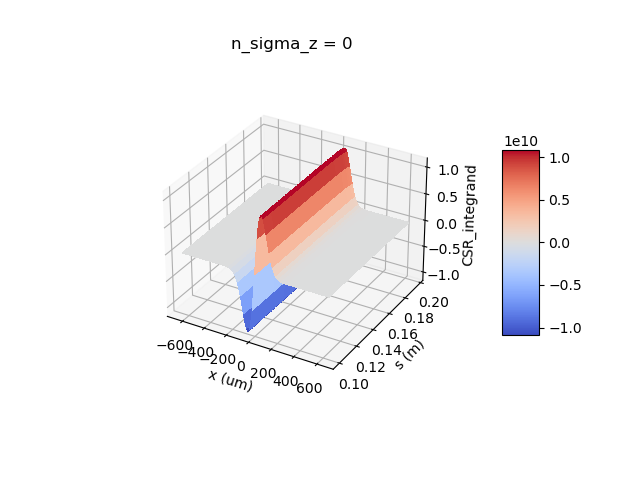

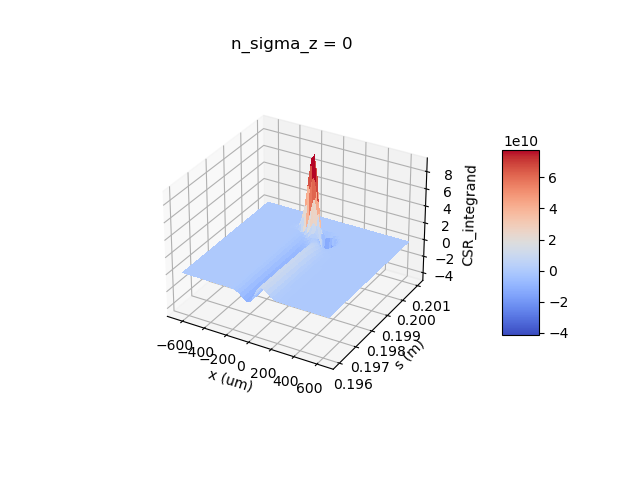

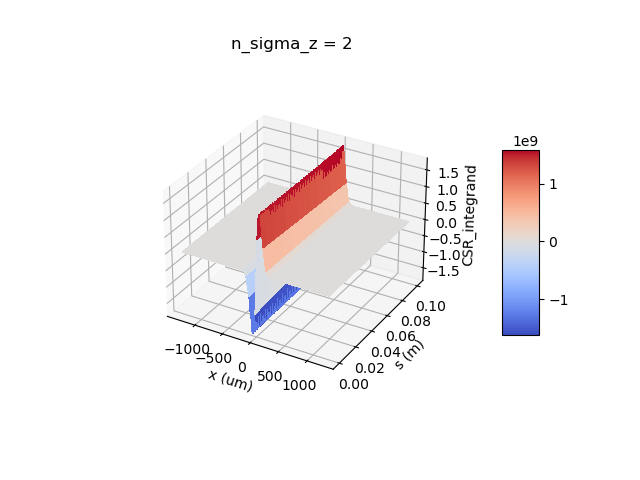

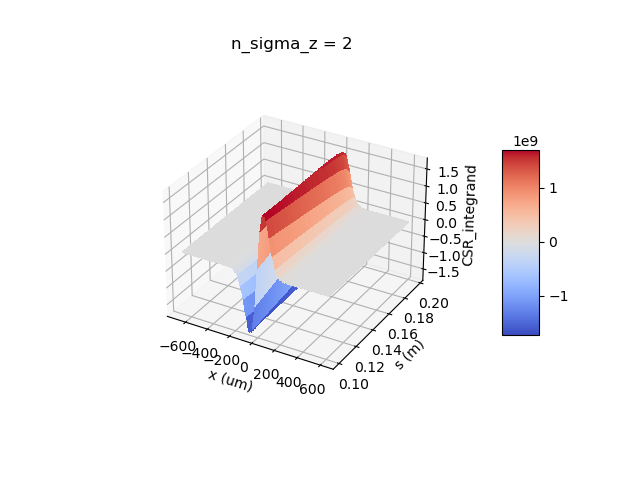

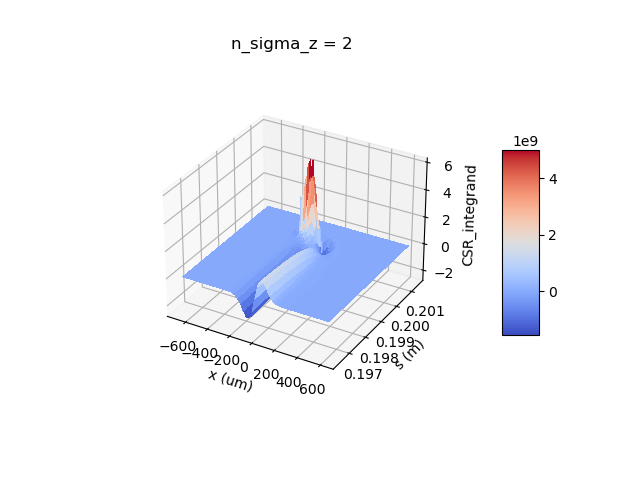

In [10]:
t = DtestCSR.beam.position
print(t)
q = -3
for k in [ -2, 0, 2]:
    s  = t + k*DtestCSR.beam.sigma_z 
    x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam.sigma_x
    title = "n_sigma_z = " +  str(k) 
        
    if np.abs(tan_theta)>1:
        
        xp1, xp2, xp3, xp4, sp1, sp2, sp3,  CSR_integrand_z1, CSR_integrand_x1, CSR_integrand_z2, CSR_integrand_x2, CSR_integrand_z3, CSR_integrand_x3, CSR_integrand_z4, CSR_integrand_x4  = DtestCSR.get_CSR_wake(s, x, debug = True)
        
        [x1, s1] = np.meshgrid(xp4, sp1, indexing='ij')
        [x2, s2] = np.meshgrid(xp3, sp2, indexing = 'ij')
        [x3, s3] = np.meshgrid(xp1, sp3, indexing='ij')
        [x4, s4] = np.meshgrid(xp2, sp3, indexing='ij')
        
        plot_2D_surface(x = x1*1e6, y = s1, z = CSR_integrand_z1, title = title)

        plot_2D_surface(x = x2*1e6, y = s2, z = CSR_integrand_z2, title = title)
        plot_2D_surface(x = x3*1e6, y = s3, z = CSR_integrand_z3, title = title)
        plot_2D_surface(x = x4*1e6, y = s4, z = CSR_integrand_z4, title = title)
    else:
        xp_w, xp_n, sp1, sp2, sp3, CSR_integrand_z1, CSR_integrand_x1,CSR_integrand_z2, CSR_integrand_x2,CSR_integrand_z3, CSR_integrand_x3 = DtestCSR.get_CSR_wake(s, x, debug = True)
        
        x1, s1 = np.meshgrid(xp_w, sp1, indexing = 'ij')
        x2, s2 = np.meshgrid(xp_n, sp2, indexing = 'ij')
        x3, s3 = np.meshgrid(xp_n, sp3, indexing = 'ij')
        
        plot_2D_surface(x = x1*1e6, y = s1, z = CSR_integrand_z1, title = title)
        plot_2D_surface(x = x2*1e6, y = s2, z = CSR_integrand_z2, title = title)
        plot_2D_surface(x = x3*1e6, y = s3, z = CSR_integrand_z3, title = title)
        
        

In [11]:
DtestCSR.DF_tracker.z_grid_interp.shape

(500,)

In [12]:
x_grids, z_grids, density, vx, density_x, density_z, vx_x = DtestCSR.DF_tracker.DF_log[-1]

In [13]:
z_grids.shape

(100,)

In [14]:
np.max(density_z)

37820358598.880455

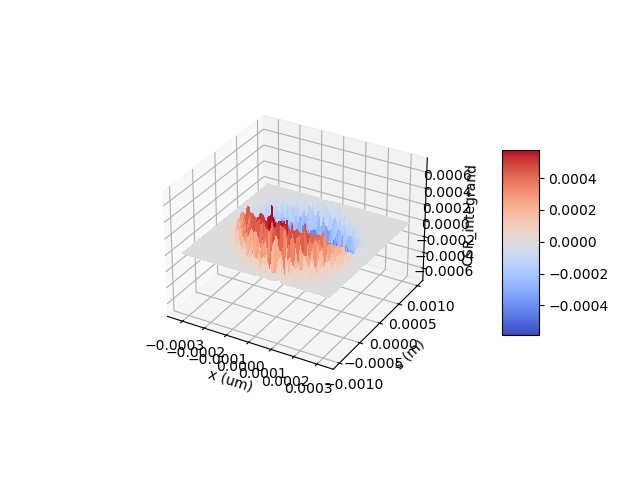

In [15]:
xmesh, zmesh = np.meshgrid(x_grids,z_grids, indexing='ij')
plot_2D_surface(x = xmesh, y = zmesh, z =vx)

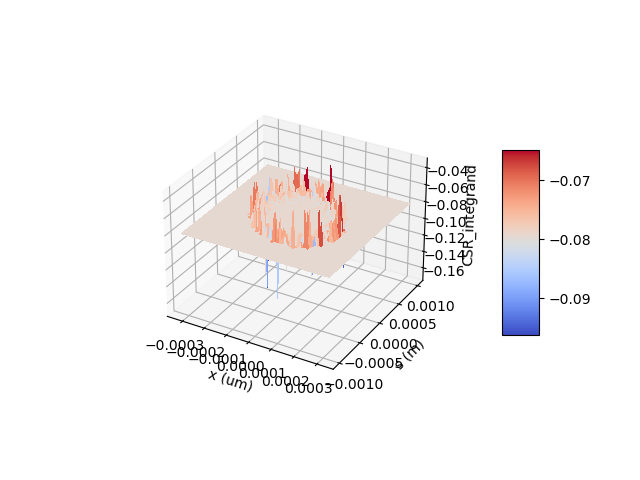

In [16]:
xmesh, zmesh = np.meshgrid(x_grids,z_grids, indexing='ij')
plot_2D_surface(x = xmesh, y = zmesh, z =vx_x)

In [18]:
np.max(z_grids)/DtestCSR.beam.sigma_z

5.000000000004435

In [19]:
DtestCSR.DF_tracker.data_density_interp.shape

(3, 500, 500)

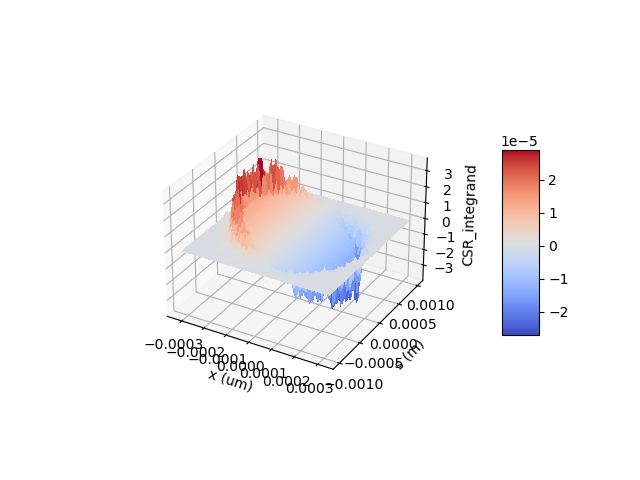

In [20]:
test = DtestCSR.DF_tracker.data_vx_interp[0,:,:]
z_grid_interp = DtestCSR.DF_tracker.z_grid_interp
x_grid_interp = DtestCSR.DF_tracker.x_grid_interp
xmesh, zmesh = np.meshgrid(x_grid_interp, z_grid_interp, indexing='ij')
plot_2D_surface(x = xmesh, y = zmesh, z = test)


In [16]:
z_grid_interp.shape

(500,)

In [18]:
t

1.0999999999999999

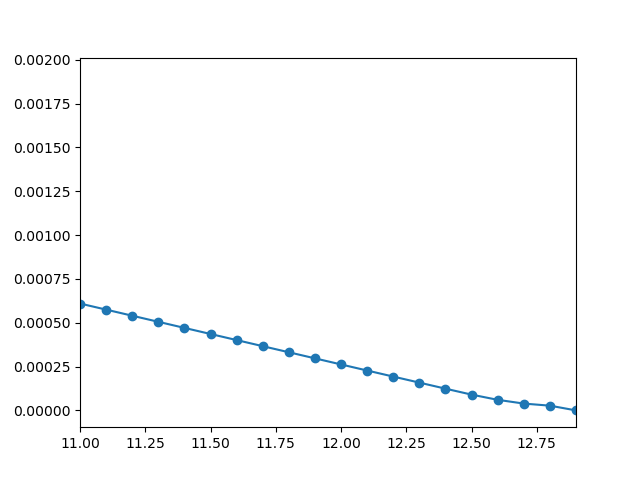

In [36]:
s = DtestCSR.lattice.steps_record
slope = DtestCSR.slope
sigX = DtestCSR.sigX
sigZ = DtestCSR.sigZ
R56 = DtestCSR.R56
plt.figure()
plt.plot(s, sigX,'o-')
plt.xlim([11,12.9])
plt.show()

0.7


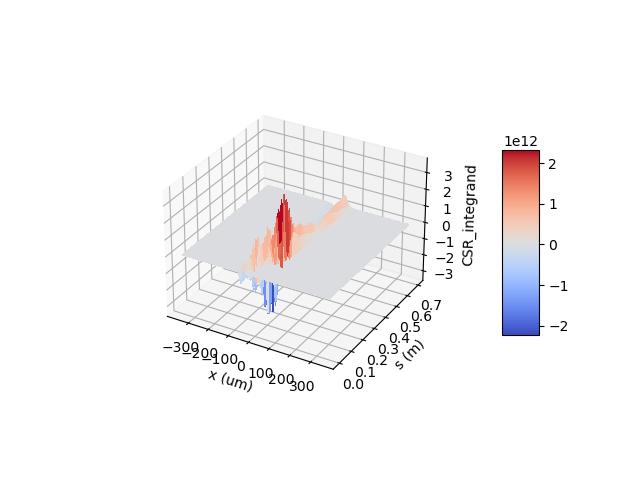

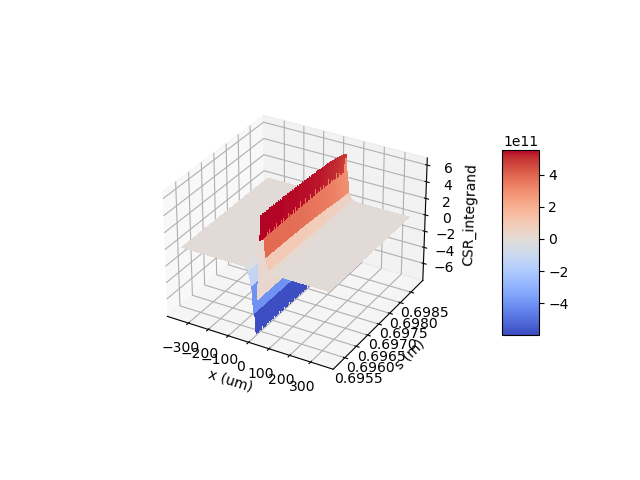

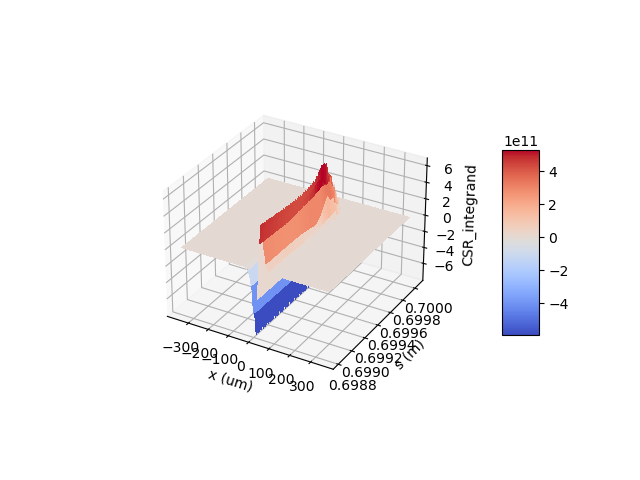

In [27]:
t = DtestCSR.beam.position
N_formation_length = 5;
N_z_end = 10;
N_z_mid1 =50;
N_z_mid2 = 200;
N_point_s1 = 500;
N_point_s2 = 500;
N_point_s3 = 500;
N_x_lim = 15;
N_point_x = 1500;
print(t)

sigZt = DtestCSR.beam._sigma_z
sigXt = DtestCSR.beam._sigma_x

for k in [0]:
    
    s  = t + k*DtestCSR.beam.sigma_z

    x = (s-t)*DtestCSR.beam.slope[0] 
    title = "n_sigma_z = " +  str(k)
        
    tan_theta = DtestCSR.beam._slope[0]
    x0 = DtestCSR.beam._mean_x
    
    
    start_point = np.max((0,s-N_formation_length*DtestCSR.formation_length));
    end_point = s + N_z_end*sigZt;
    mid_point1 = s - N_z_mid1 *sigXt;
    mid_point2 = s - N_z_mid2 *sigXt;
    xlim_L = x-N_x_lim*sigXt;
    xlim_R = x + N_x_lim*sigXt;
    
    s_range_t1 = np.linspace(start_point,mid_point2,N_point_s1);
    s_range_t2 = np.linspace(mid_point2,mid_point1,N_point_s2);
    s_range_t3 = np.linspace(mid_point1,end_point,N_point_s3);
    #s_range_t = [s_range_t1,s_range_t2(2:end),s_range_t3(2:end)];
    x_range_t = np.linspace(xlim_L,xlim_R, N_point_x);
    
    [xp_mesh1, sp_mesh1] = np.meshgrid(x_range_t, s_range_t1 , indexing='ij')
    [xp_mesh2, sp_mesh2] = np.meshgrid(x_range_t, s_range_t2 , indexing='ij')
    [xp_mesh3, sp_mesh3] = np.meshgrid(x_range_t, s_range_t3 , indexing='ij')
        

        
       
    CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh1, sp = sp_mesh1)
    plot_2D_surface(x = xp_mesh1*1e6, y = sp_mesh1, z = CSR_integrand_z)
        
    CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh2, sp = sp_mesh2)
    plot_2D_surface(x = xp_mesh2*1e6, y = sp_mesh2, z = CSR_integrand_z)

    CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh3, sp = sp_mesh3)
    plot_2D_surface(x = xp_mesh3*1e6, y = sp_mesh3, z = CSR_integrand_z)

 


0.5499999999999999
s1 =  0.0  s2 =  0.5499140082967243  s3 =  0.5500039087137852


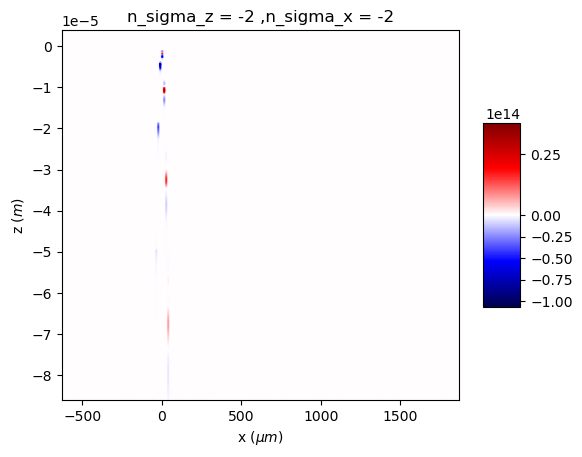

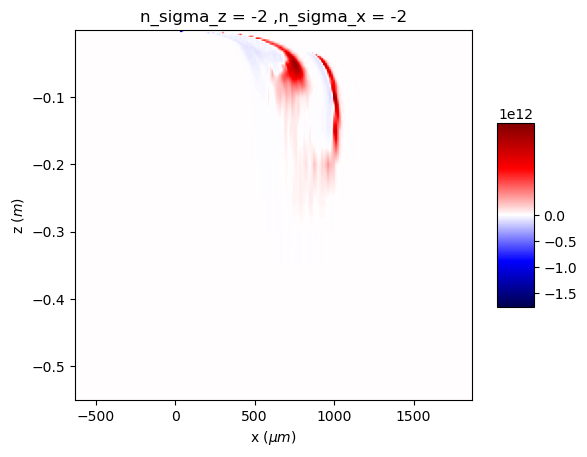

s1 =  0.0  s2 =  0.5499140082967243  s3 =  0.5500039087137852


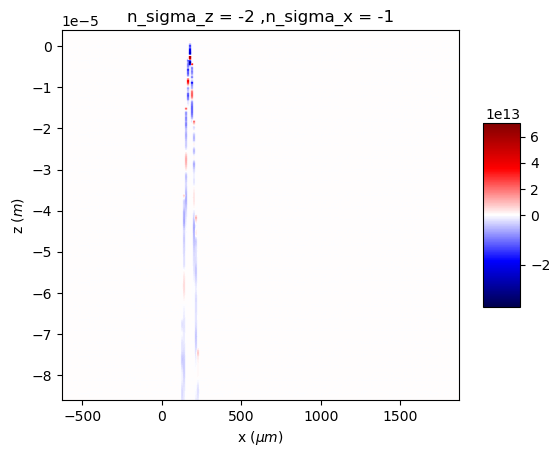

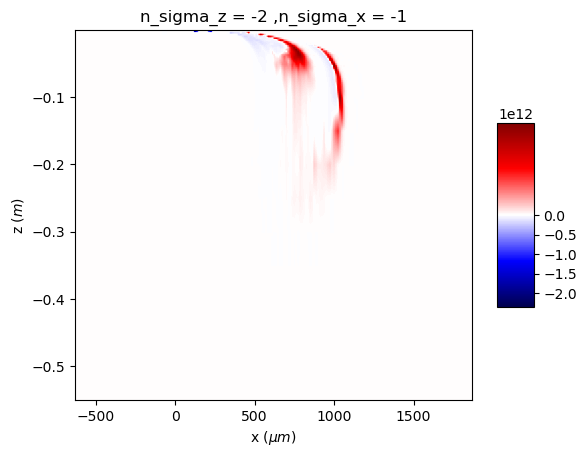

s1 =  0.0  s2 =  0.5499140082967243  s3 =  0.5500039087137852


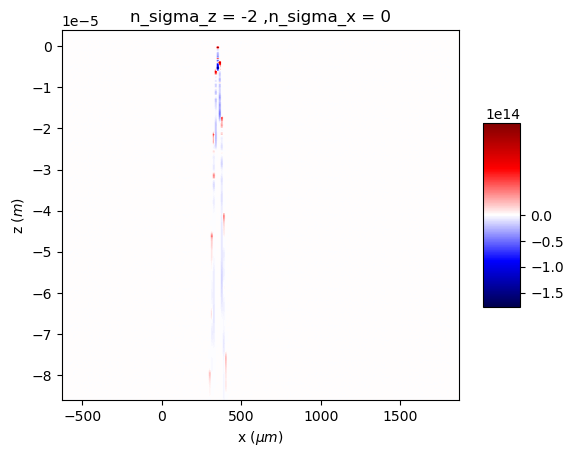

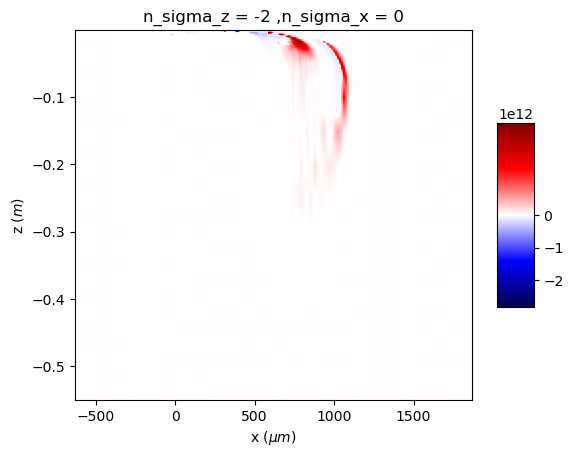

s1 =  0.0  s2 =  0.5499140082967243  s3 =  0.5500039087137852


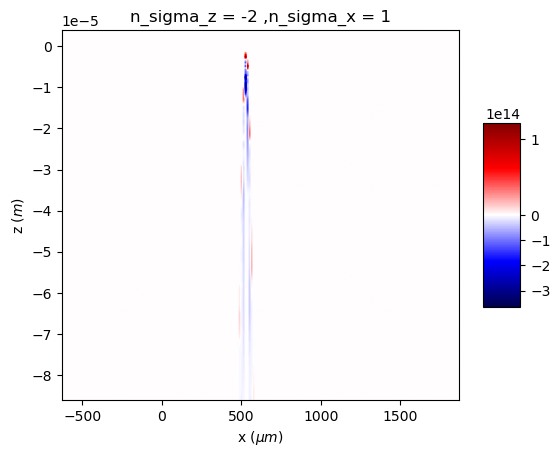

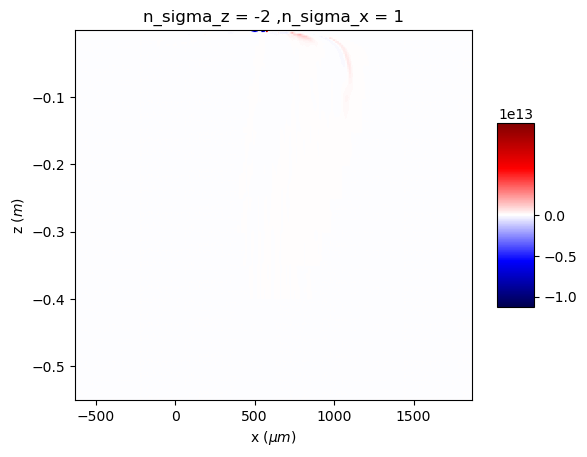

s1 =  0.0  s2 =  0.5499140082967243  s3 =  0.5500039087137852


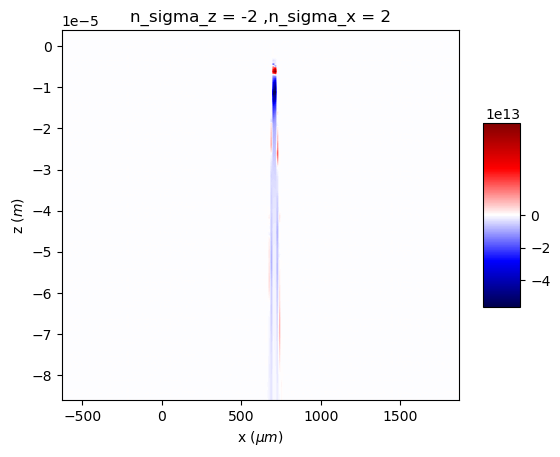

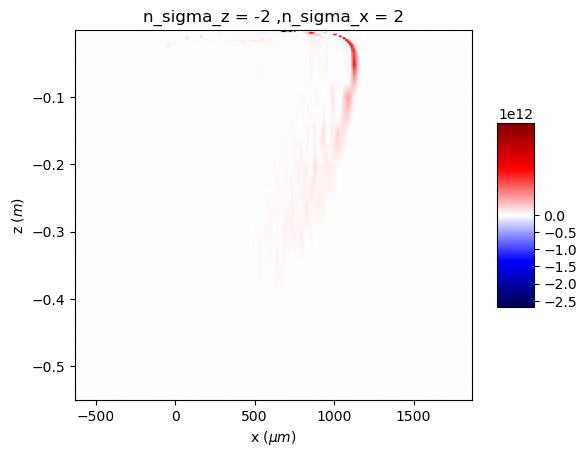

s1 =  0.0  s2 =  0.5499179170105095  s3 =  0.5500078174275704


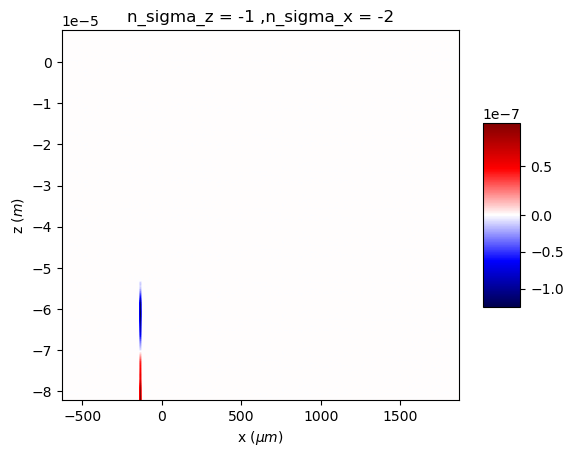

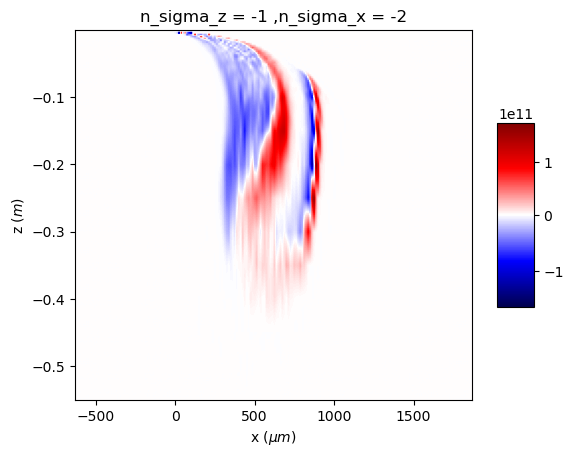

s1 =  0.0  s2 =  0.5499179170105095  s3 =  0.5500078174275704


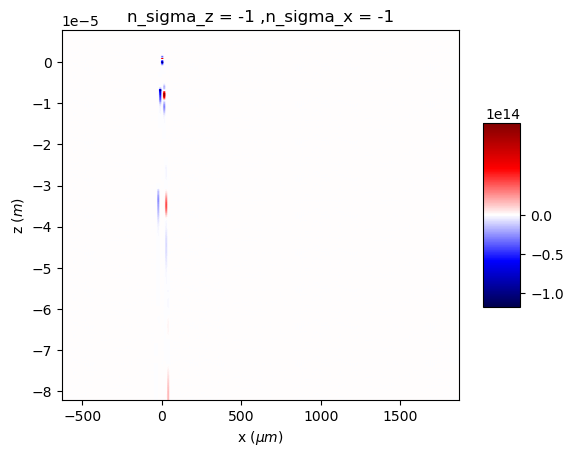

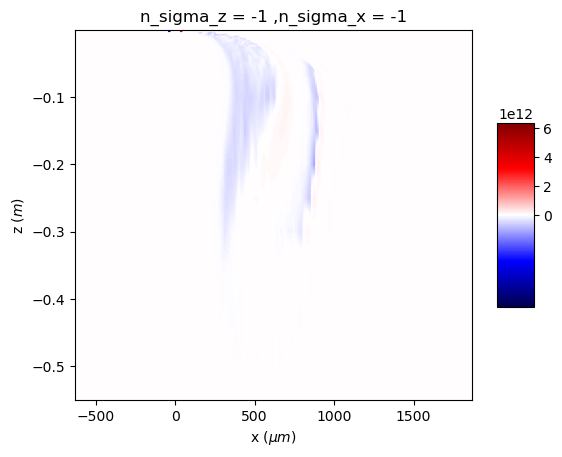

s1 =  0.0  s2 =  0.5499179170105095  s3 =  0.5500078174275704


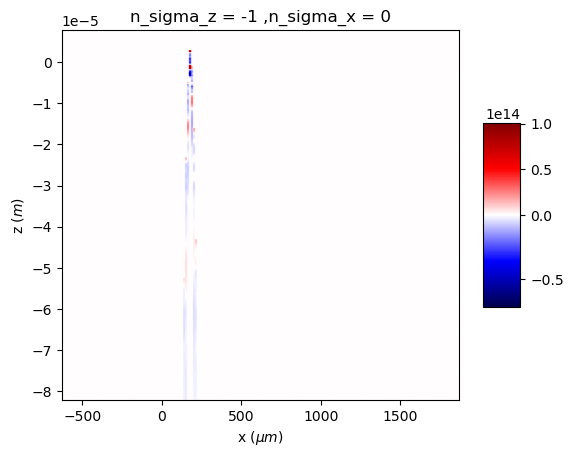

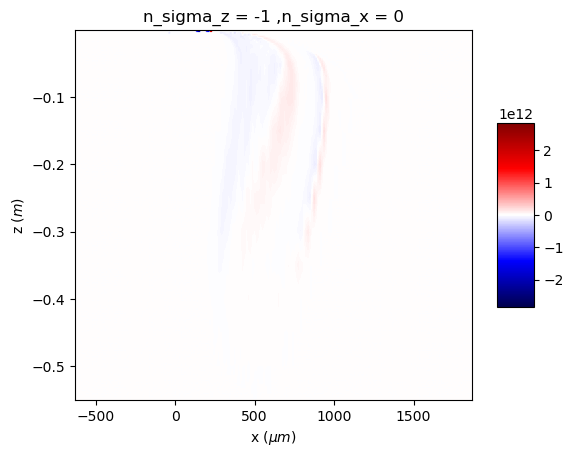

s1 =  0.0  s2 =  0.5499179170105095  s3 =  0.5500078174275704


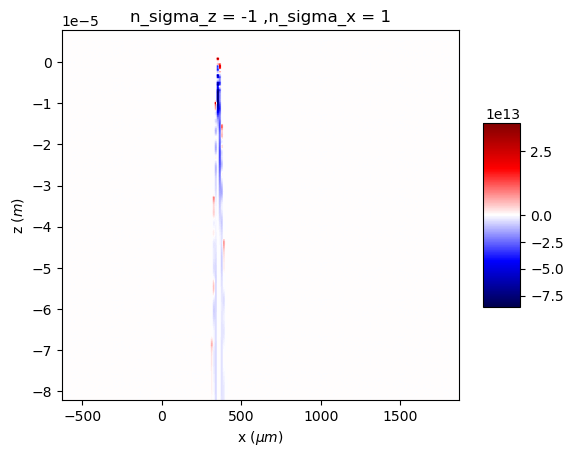

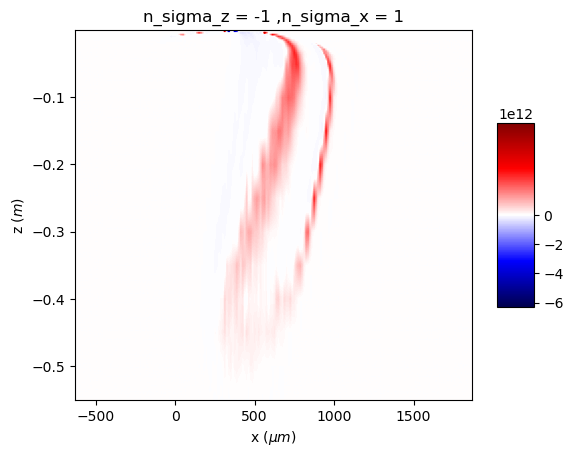

s1 =  0.0  s2 =  0.5499179170105095  s3 =  0.5500078174275704


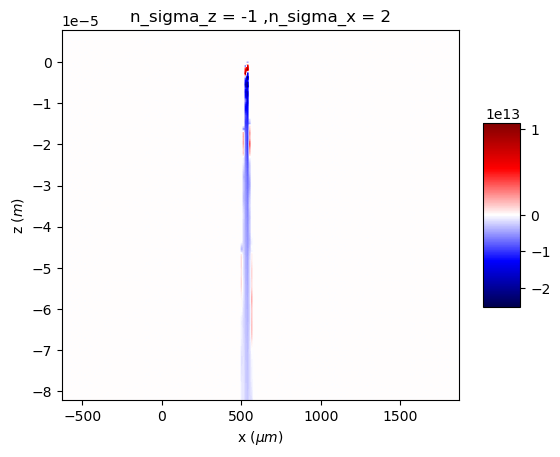

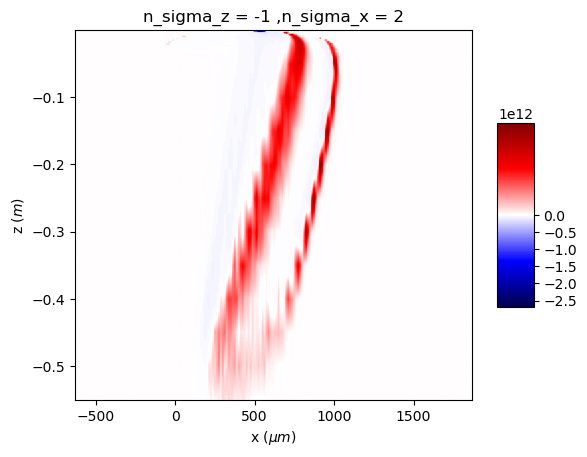

s1 =  0.0  s2 =  0.5499218257242948  s3 =  0.5500117261413557


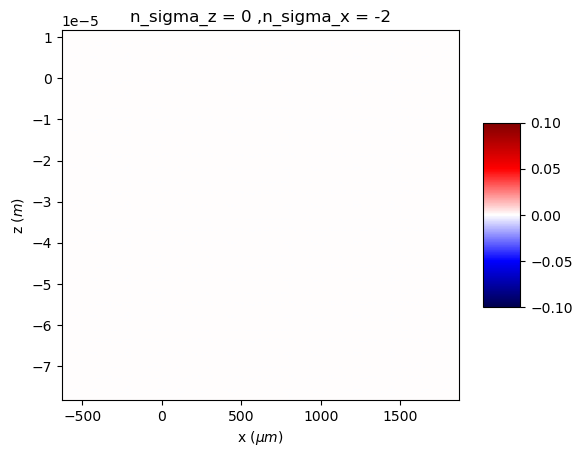

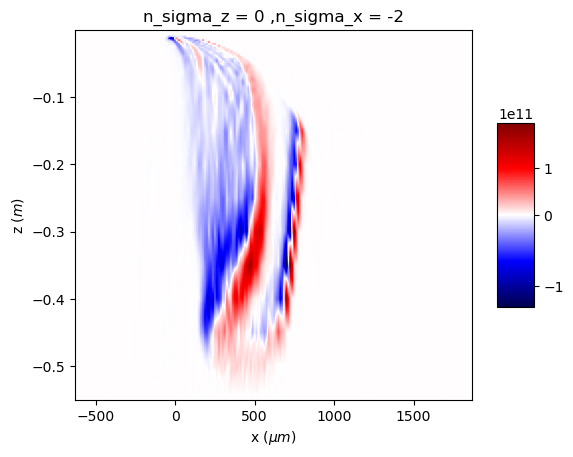

s1 =  0.0  s2 =  0.5499218257242948  s3 =  0.5500117261413557


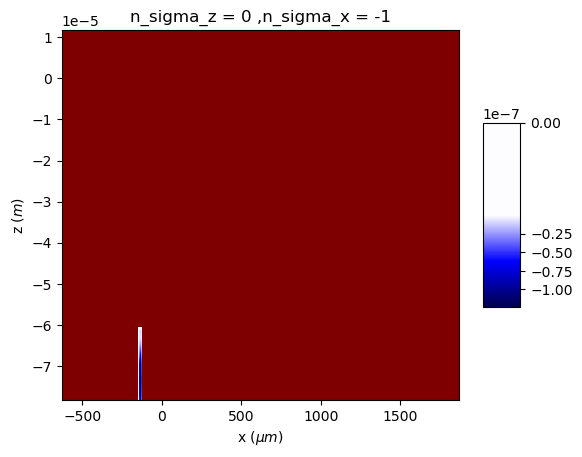

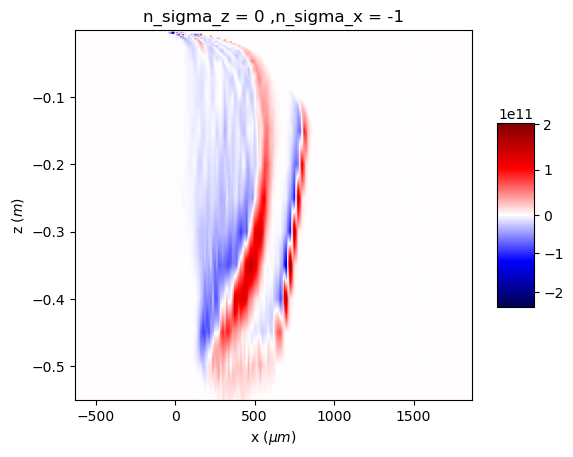

s1 =  0.0  s2 =  0.5499218257242948  s3 =  0.5500117261413557


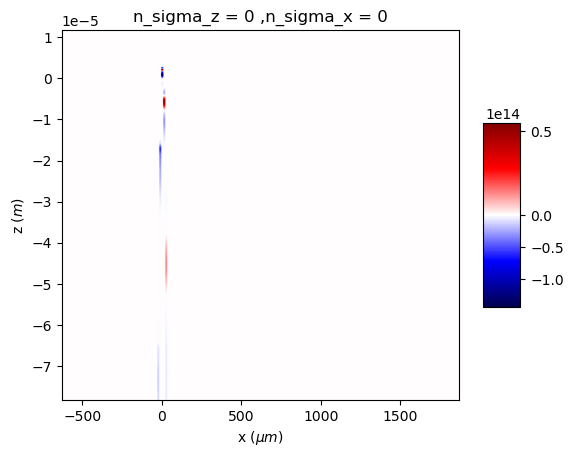

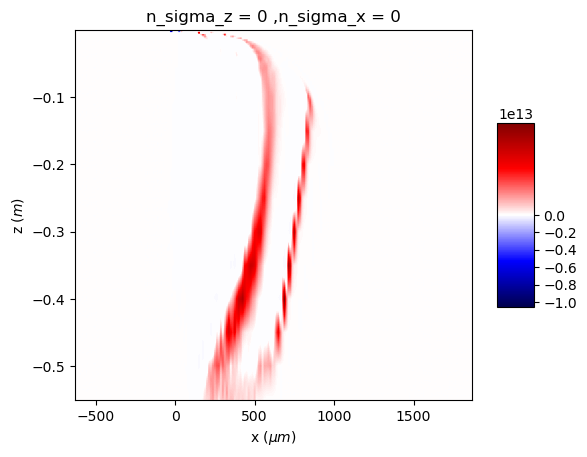

s1 =  0.0  s2 =  0.5499218257242948  s3 =  0.5500117261413557


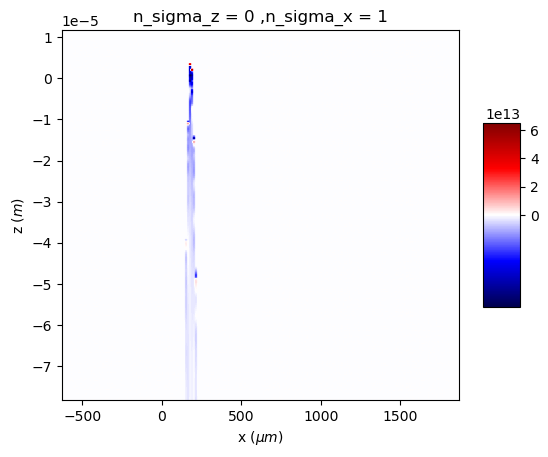

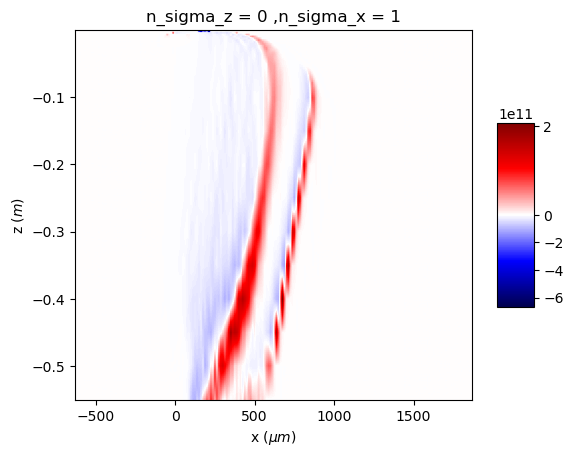

s1 =  0.0  s2 =  0.5499218257242948  s3 =  0.5500117261413557


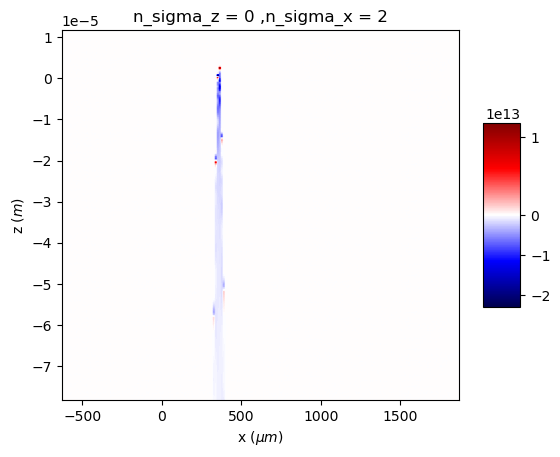

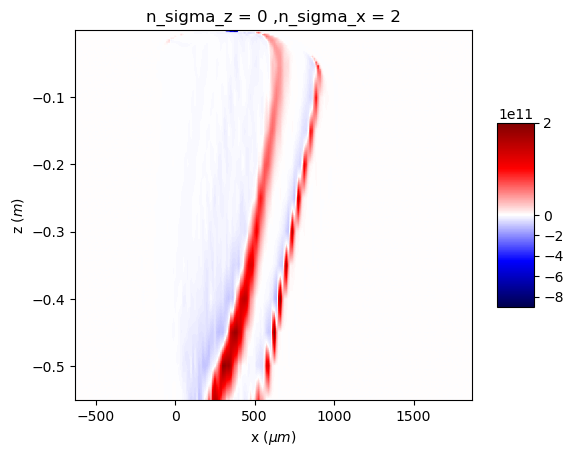

s1 =  0.0  s2 =  0.5499257344380801  s3 =  0.550015634855141


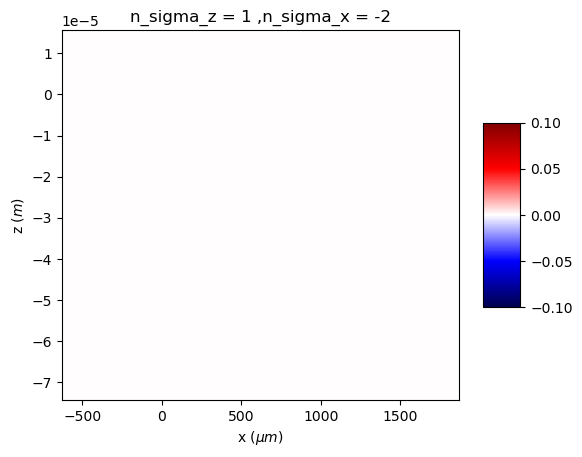

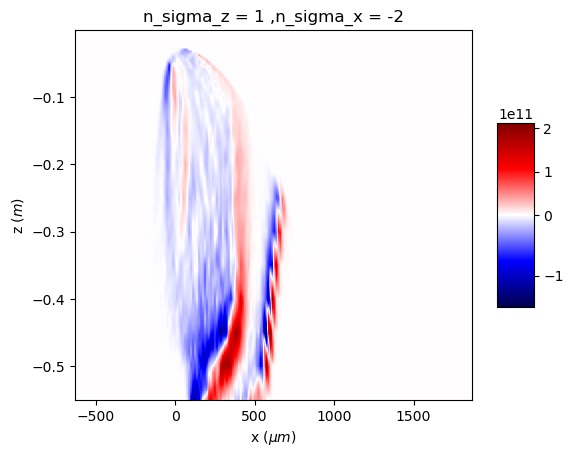

s1 =  0.0  s2 =  0.5499257344380801  s3 =  0.550015634855141


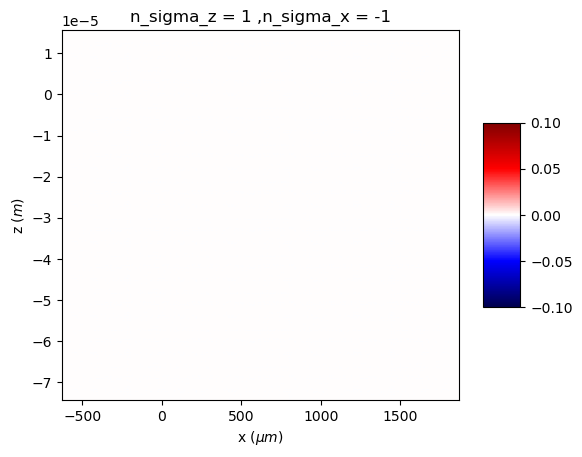

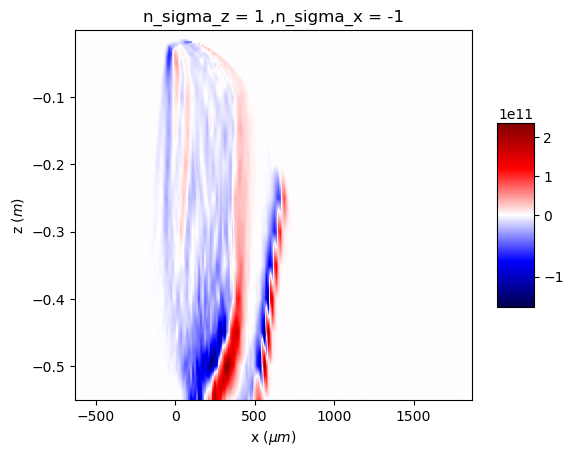

s1 =  0.0  s2 =  0.5499257344380801  s3 =  0.550015634855141


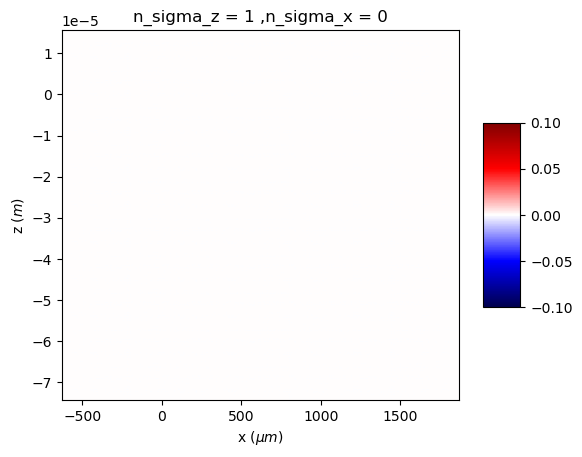

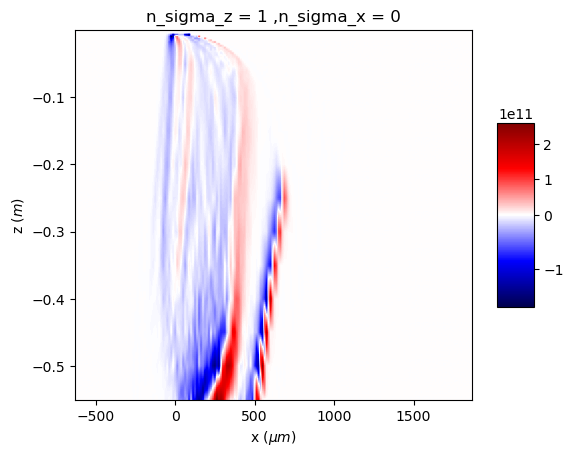

s1 =  0.0  s2 =  0.5499257344380801  s3 =  0.550015634855141


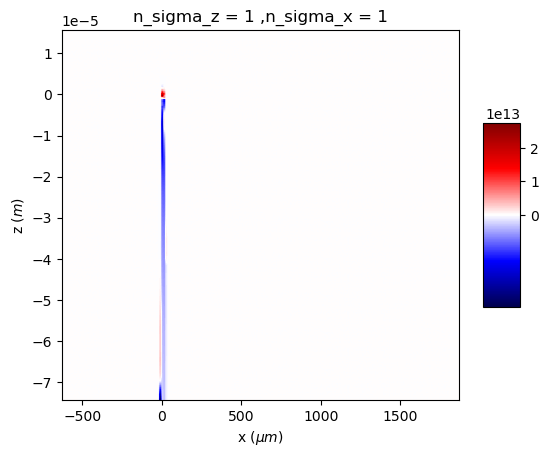

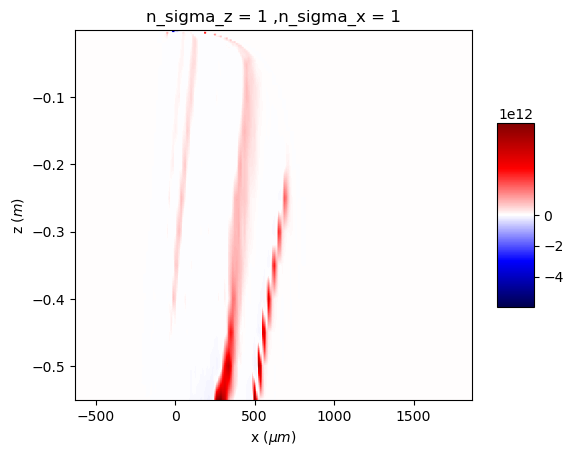

s1 =  0.0  s2 =  0.5499257344380801  s3 =  0.550015634855141


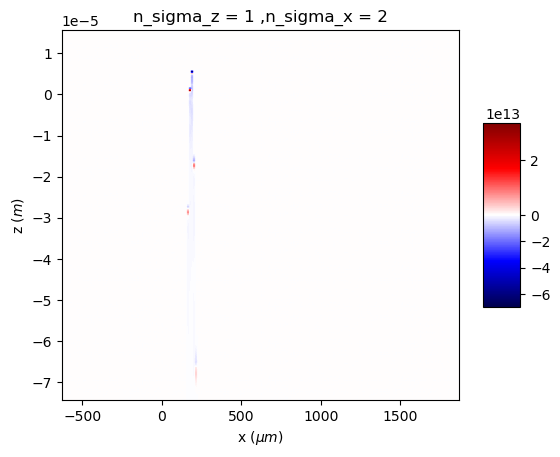

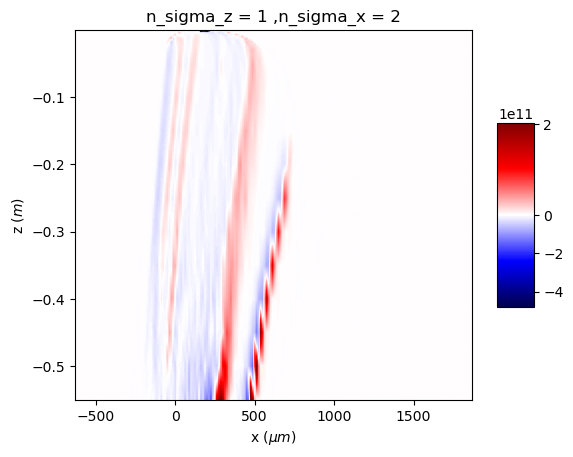

s1 =  0.0  s2 =  0.5499296431518653  s3 =  0.5500195435689262


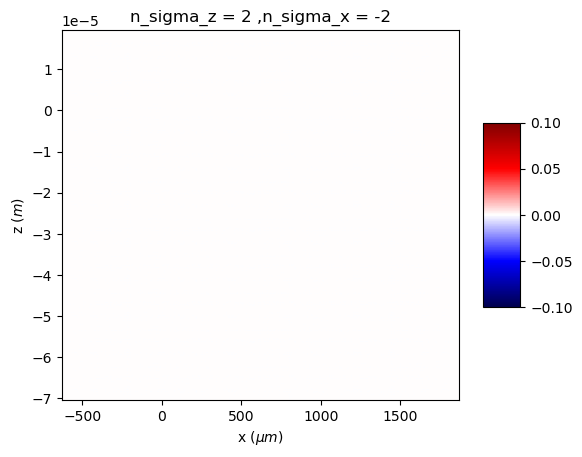

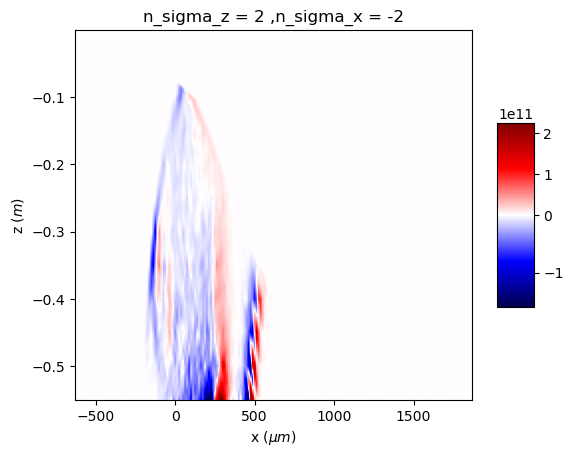

s1 =  0.0  s2 =  0.5499296431518653  s3 =  0.5500195435689262


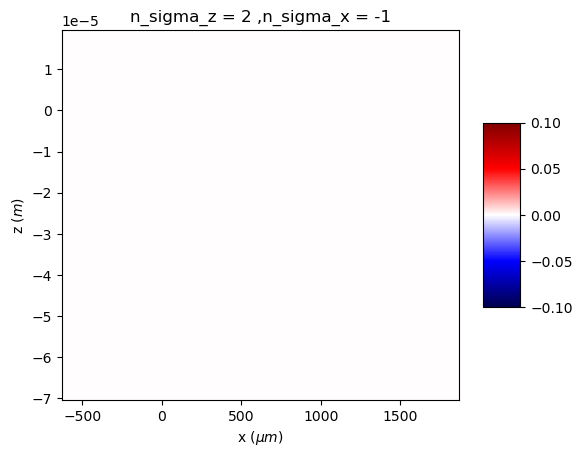

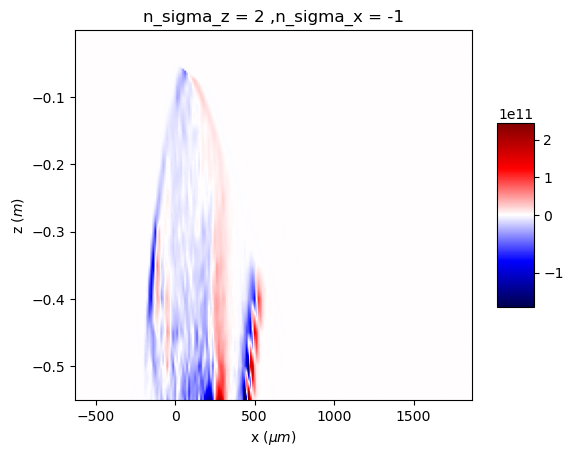

s1 =  0.0  s2 =  0.5499296431518653  s3 =  0.5500195435689262


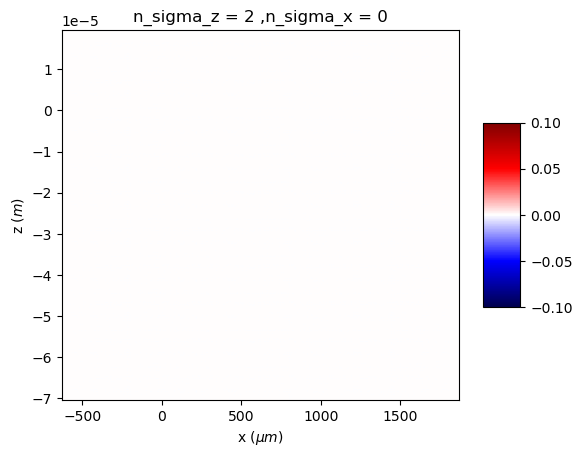

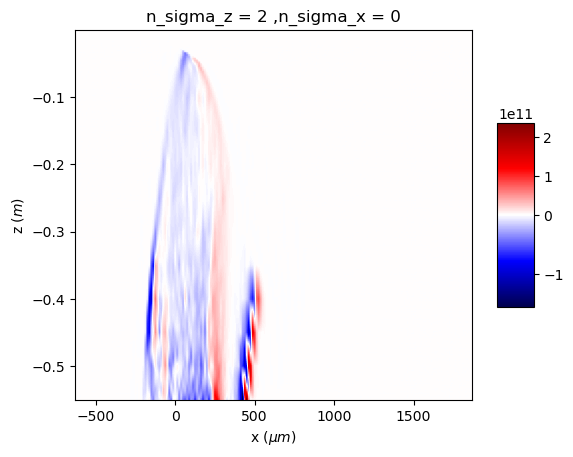

s1 =  0.0  s2 =  0.5499296431518653  s3 =  0.5500195435689262


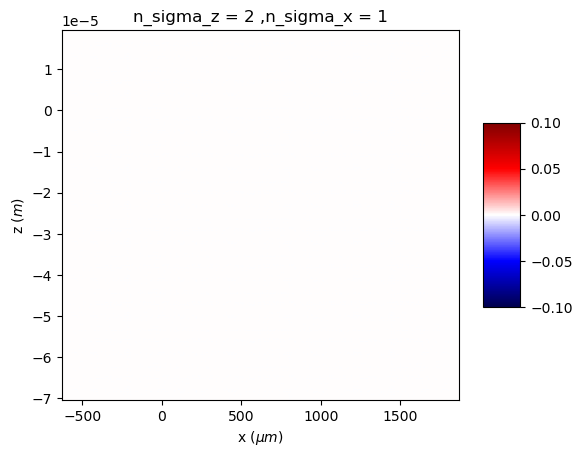

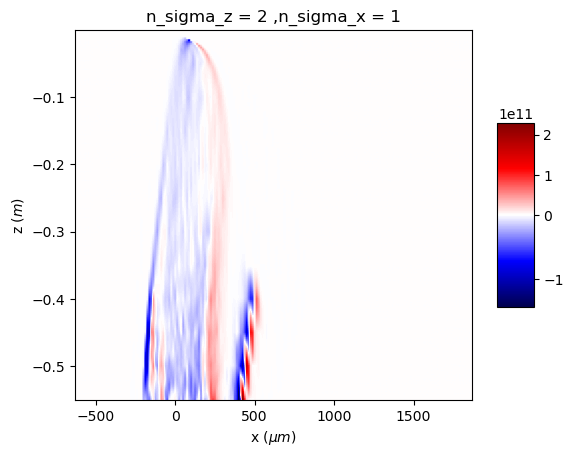

s1 =  0.0  s2 =  0.5499296431518653  s3 =  0.5500195435689262


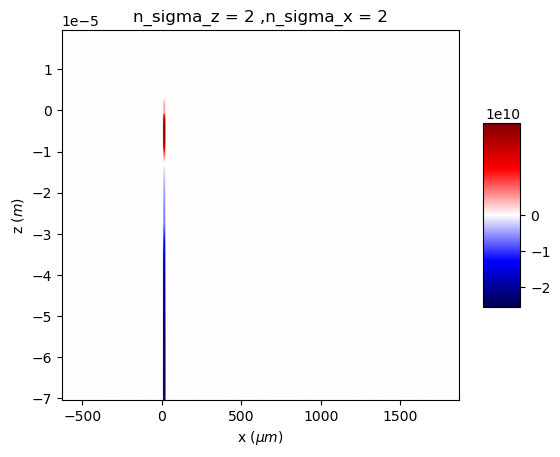

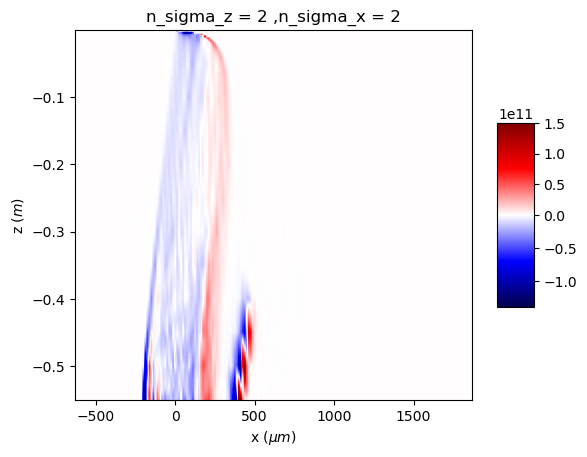

In [60]:
t = DtestCSR.beam.position
print(t)
for k in [-2,-1,0, 1,2]:
    s  = t + k*DtestCSR.beam.sigma_z
    for q in [-2, -1, 0, 1,2]:
        x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam._sigma_x_transform
        title = "n_sigma_z = " +  str(k) +  " ,n_sigma_x = " + str(q)
        
        tan_theta = DtestCSR.beam._slope[0]
        x0 = DtestCSR.beam._mean_x

        

        chirp_band = False
        
        if np.abs(tan_theta) <= 50:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
            s2 = s - 20*DtestCSR.beam._sigma_z
            s3 = s + 3*DtestCSR.beam._sigma_z
            x1 = x0 - 5*DtestCSR.beam._sigma_x
            x2 = x0 + 5*DtestCSR.beam._sigma_x
        else:
            chirp_band = True
            if tan_theta > 0:
                tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
                d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
                s2 = np.max((0,s - d))
                s3 = s + 3*DtestCSR.beam._sigma_z

                #area 1
                x1_l = x + 0.5*DtestCSR.beam._sigma_x
                x1_r = x + 5*DtestCSR.beam._sigma_x
                print('x1_l = ', x1_l, 'x1_r = ', x1_r)
               
                #area 2 
                x2_l = x - 10*DtestCSR.beam._sigma_x_transform
                x2_r = x1_l

                print('x2_l = ', x2_l, 'x2_r = ', x2_r)
                #area 3
                x3_l = x - 40*DtestCSR.beam._sigma_x_transform
                x3_r = x + 20*DtestCSR.beam._sigma_x_transform
                
        
            else:
                tan_alpha = 2*tan_theta/(1-tan_theta**2)
                d = -(x0 - x - 5*DtestCSR.beam._sigma_x)/tan_alpha
                s2 = np.max((0,s - d))
                s3 = s + 3*DtestCSR.beam._sigma_z
                #area 1
                x1_l = x - 5*DtestCSR.beam._sigma_x
                #x1_r = x - 10*DtestCSR.beam._sigma_x_transform
                x1_r = x - 0.5*DtestCSR.beam._sigma_x
                #area 2 
                x2_l = x1_r
                x2_r = x + 1*DtestCSR.beam._sigma_x
                #x2_r = x + 10*DtestCSR.beam._sigma_x_transform
                #area 3
                #x3_l = x - 20*DtestCSR.beam._sigma_x_transform
                #x3_r = x + 100*DtestCSR.beam._sigma_x_transform
                x3_l = x - 1*DtestCSR.beam._sigma_x
                x3_r = x + 3*DtestCSR.beam._sigma_x
        s1 = np.max((0, s2 - 2*DtestCSR.formation_length))   
        print('s1 = ', s1, ' s2 = ',s2, ' s3 = ', s3)
        #print('x1 = ', x1, ' x2 = ', x2, ' x3 = ', x3)
            
        if chirp_band:
            sp1= np.linspace(s1, s2, 200)
            sp2 = np.linspace(s2, s3, 200)
            xp1 = np.linspace(x1_l, x1_r, 200)
            xp2 = np.linspace(x2_l, x2_r, 200)
            xp3 = np.linspace(x3_l, x3_r, 200)
        
            [xp_mesh1, sp_mesh1] = np.meshgrid(xp1, sp2, indexing='ij')
            [xp_mesh2, sp_mesh2] = np.meshgrid(xp2, sp2, indexing='ij')
            [xp_mesh3, sp_mesh3] = np.meshgrid(xp3, sp1, indexing='ij')

       
            CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh1, sp = sp_mesh1)
            ax = plot_2D_contour(x = xp1*1e6, y = (sp2-t), z = CSR_integrand_z.T, title = title)
        
            CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh2, sp = sp_mesh2)
            ax = plot_2D_contour(x = xp2*1e6, y = (sp2-t), z = CSR_integrand_z.T, title = title)

            CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh3, sp = sp_mesh3)
            ax = plot_2D_contour(x = xp3*1e6, y = (sp1-t), z = CSR_integrand_z.T, title = title)

        else:
            sp1= np.linspace(s1, s2, 200)
            sp2 = np.linspace(s2, s3, 200)
            xp = np.linspace(x1, x2, 200)
        
            
            [xp_mesh2, sp_mesh2] = np.meshgrid(xp, sp2, indexing='ij')
            [xp_mesh3, sp_mesh3] = np.meshgrid(xp, sp1, indexing='ij')

        
            CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh2, sp = sp_mesh2)
            ax = plot_2D_contour(x = xp*1e6, y = (sp2-t), z = CSR_integrand_z.T, title = title)

            CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh3, sp = sp_mesh3)
            ax = plot_2D_contour(x = xp*1e6, y = (sp1-t), z = CSR_integrand_z.T, title = title)


6.5999999999999925


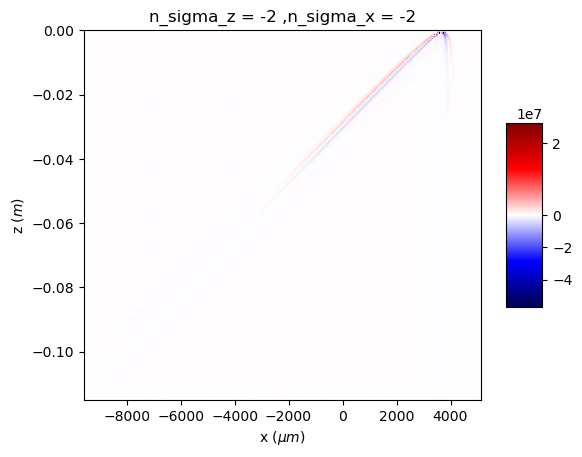

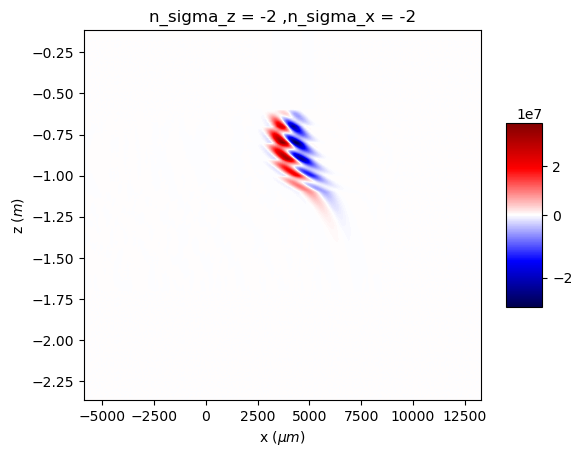

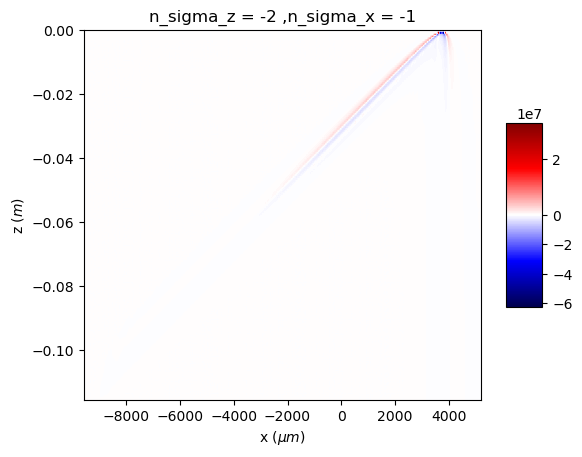

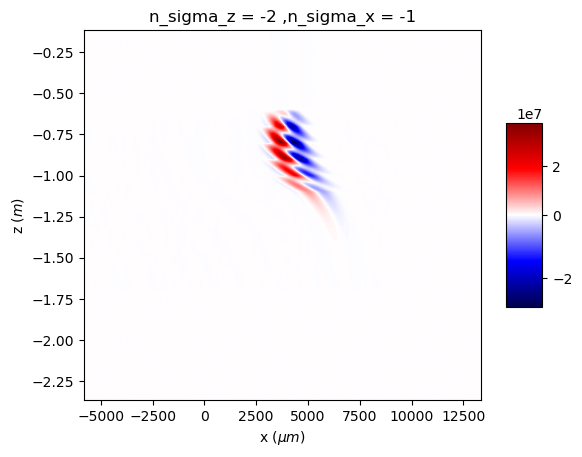

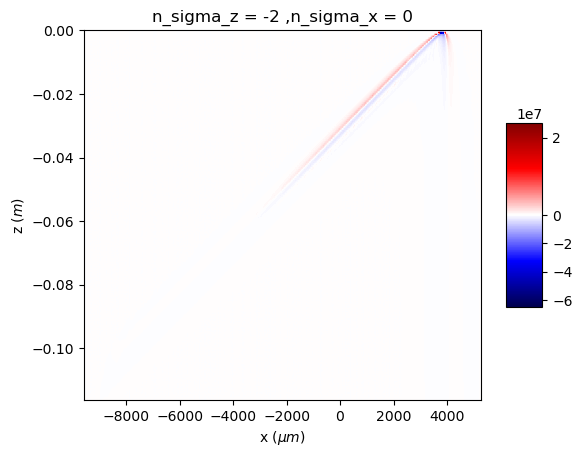

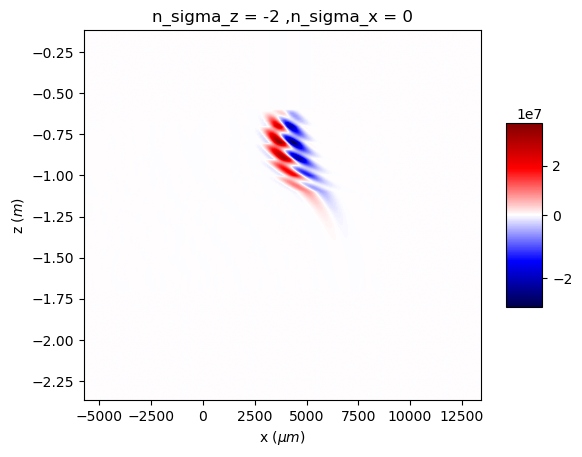

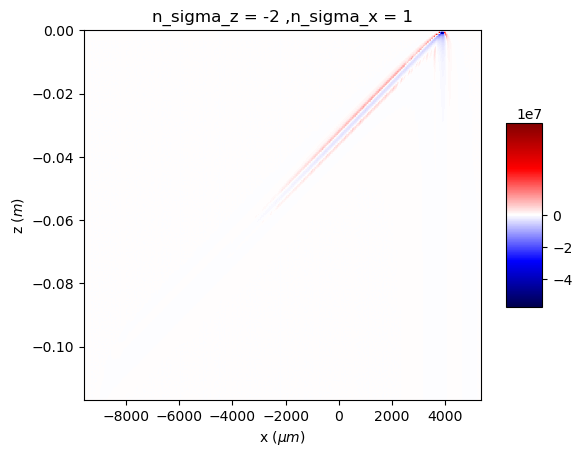

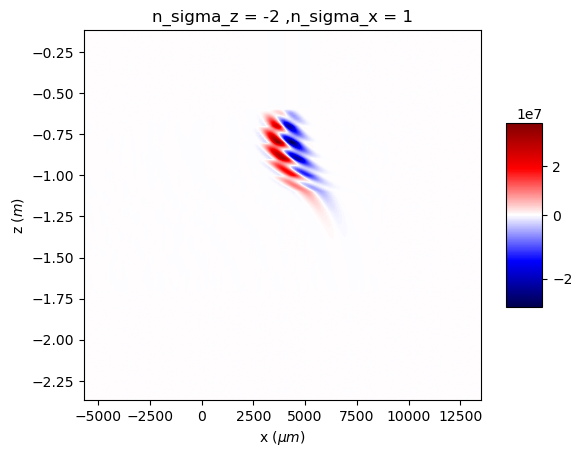

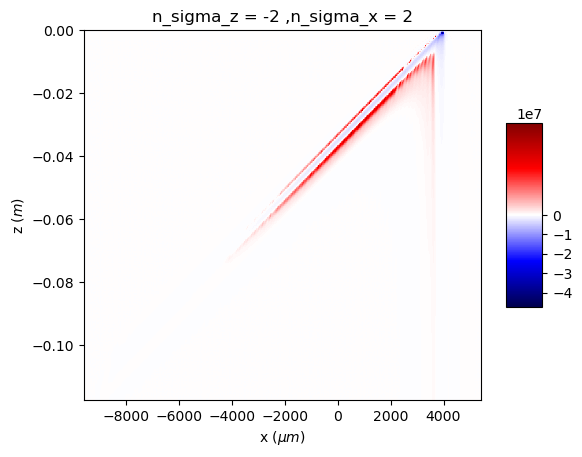

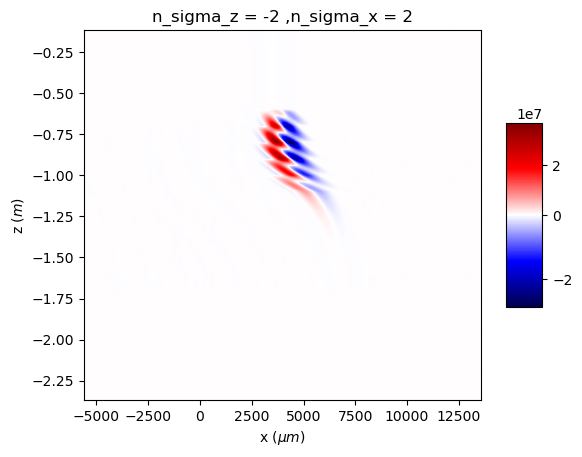

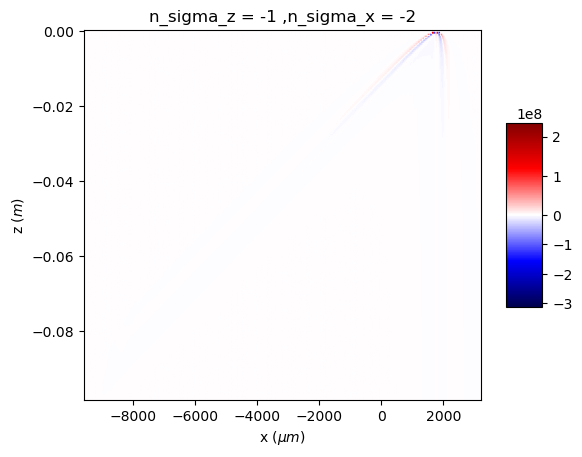

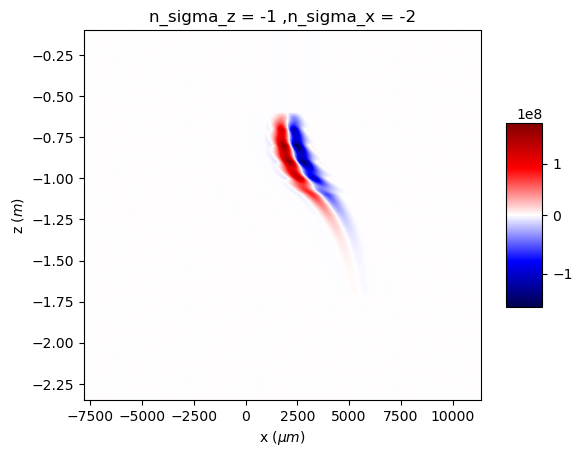

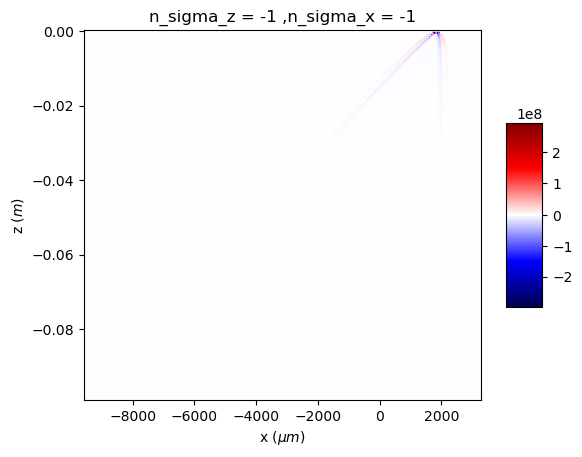

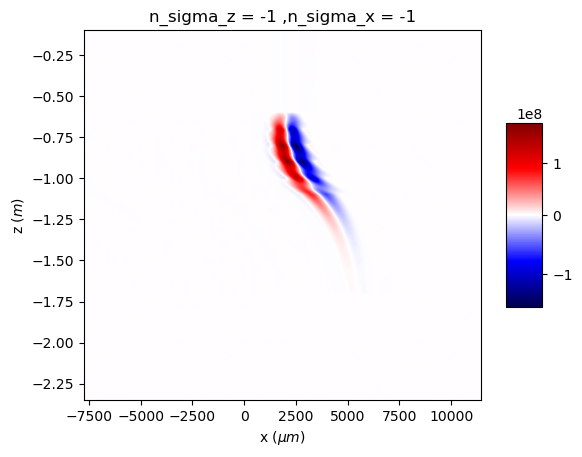

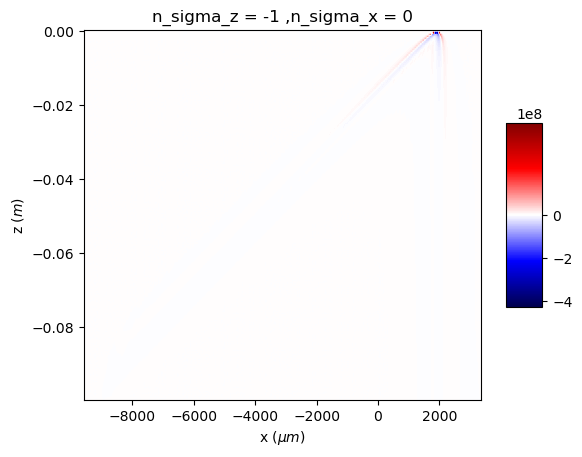

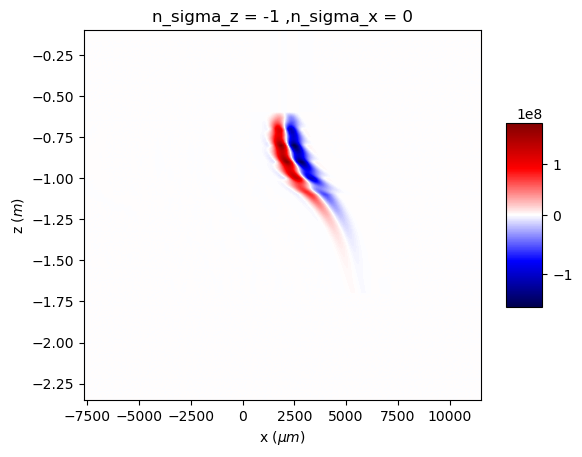

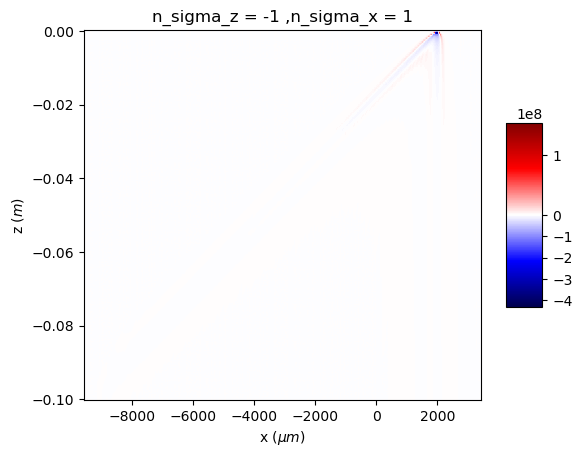

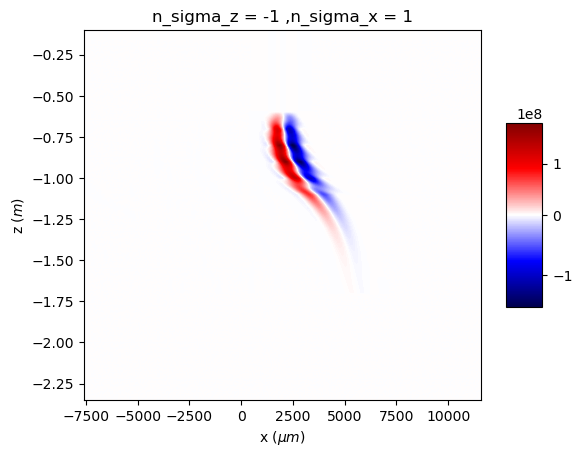

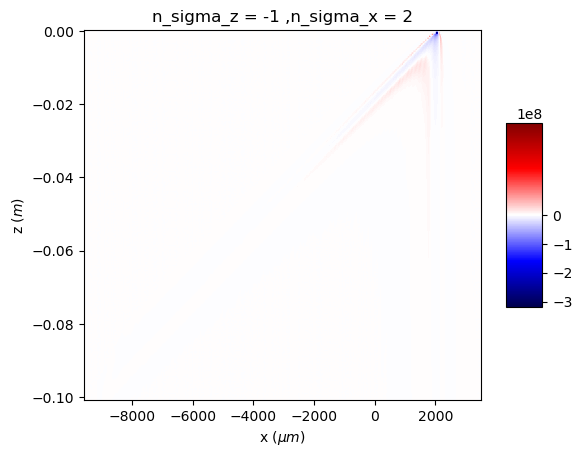

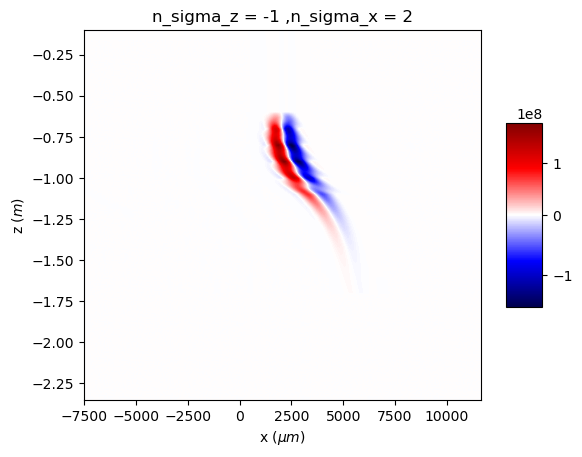

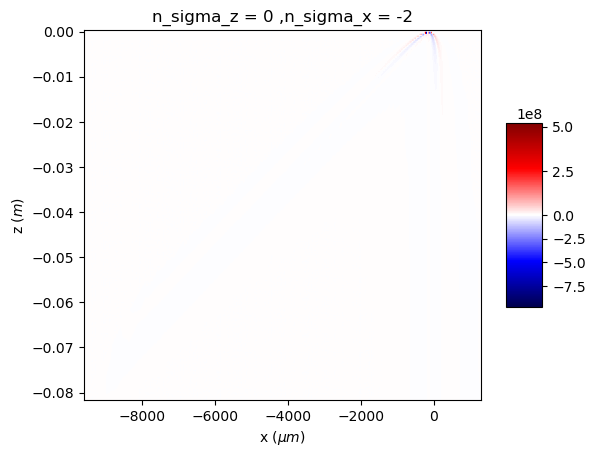

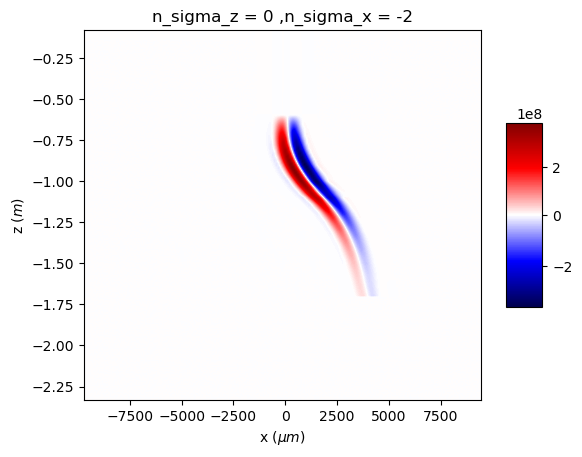

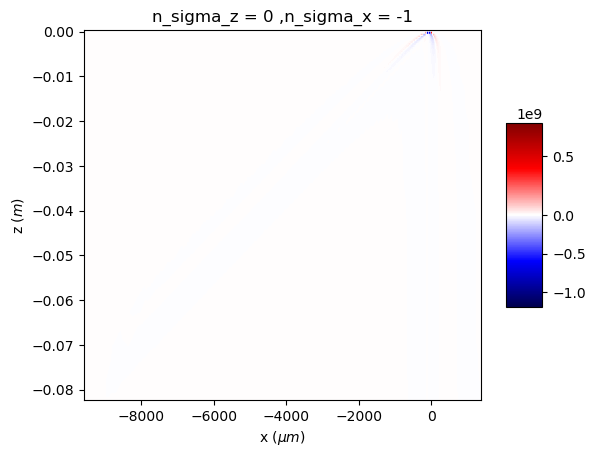

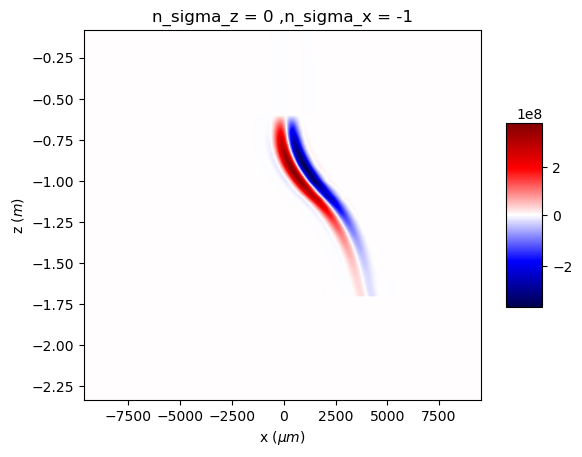

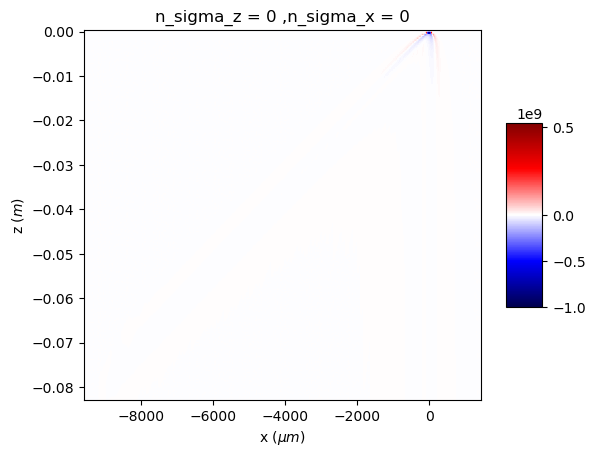

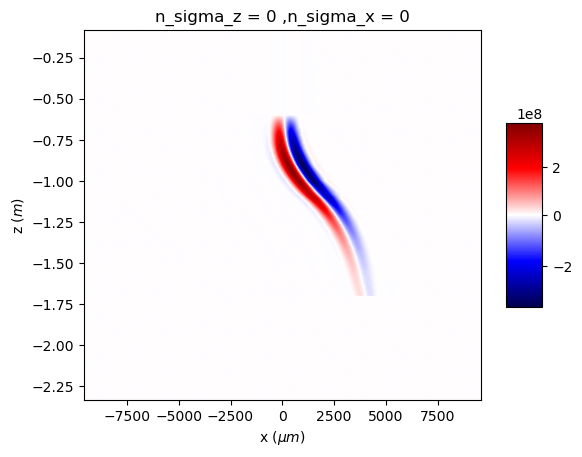

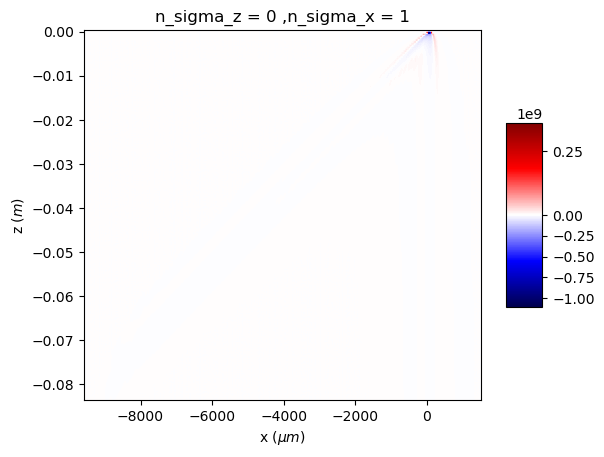

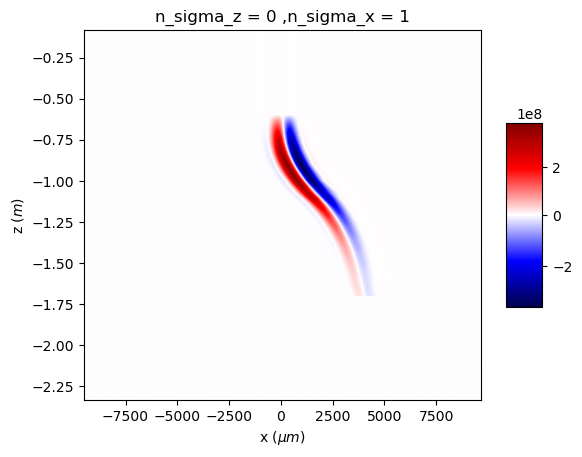

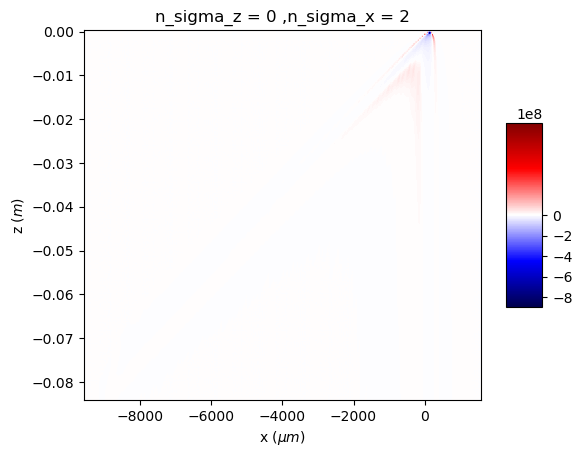

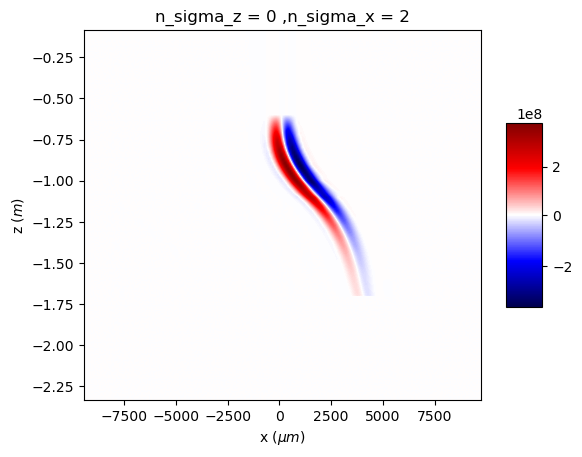

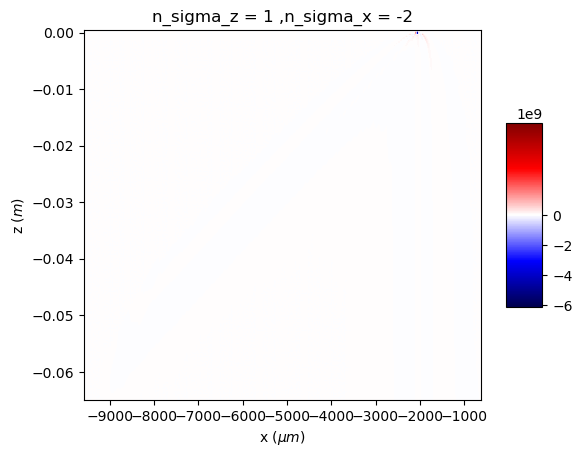

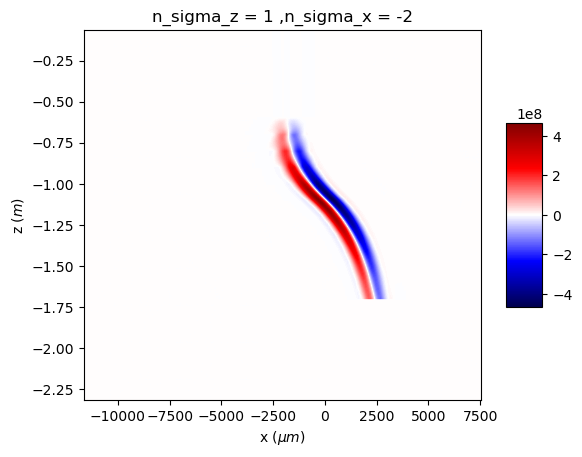

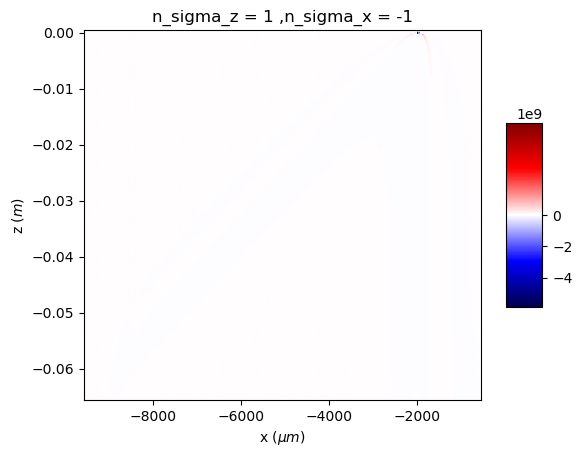

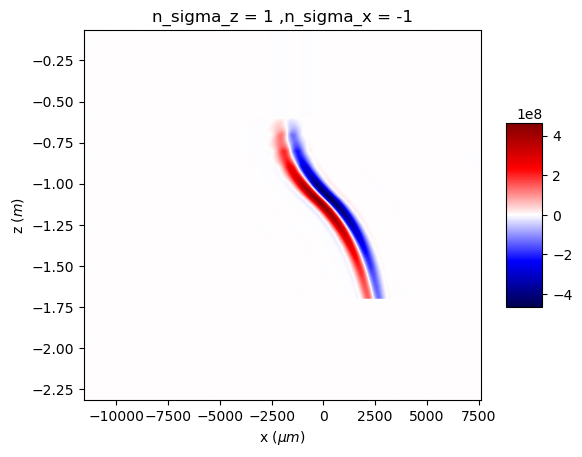

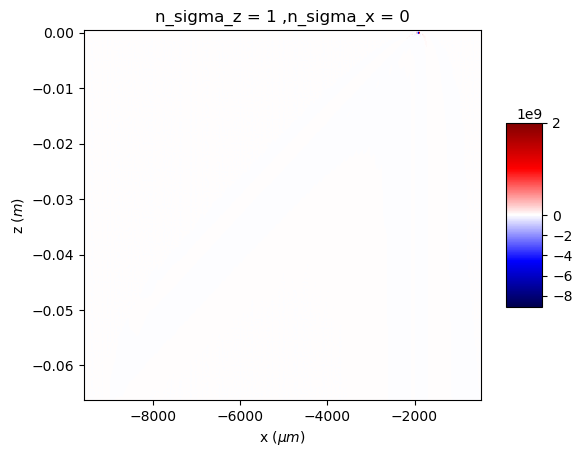

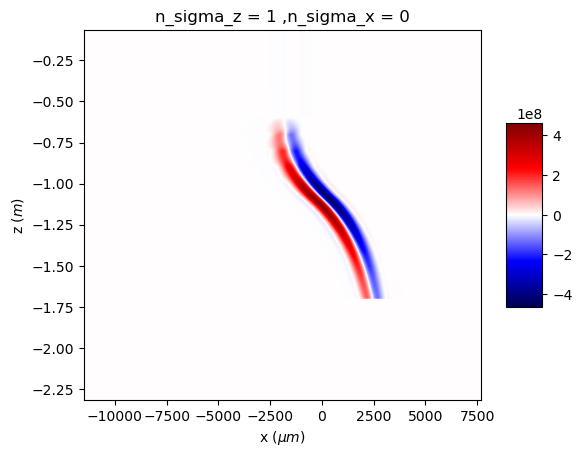

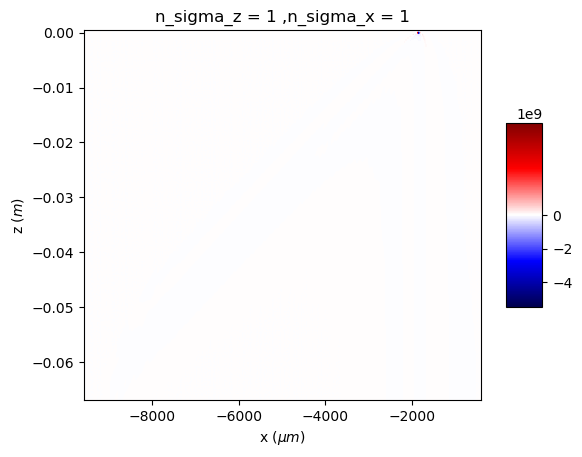

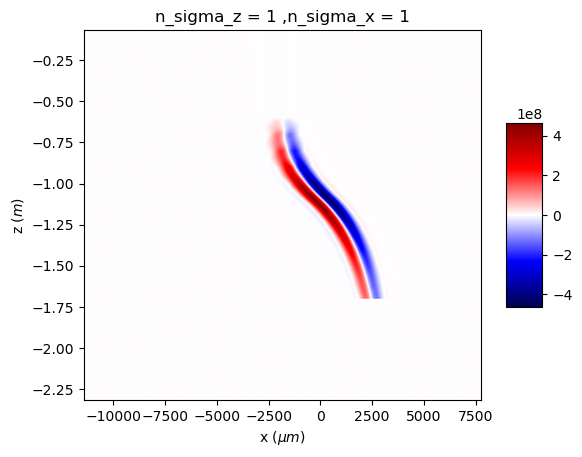

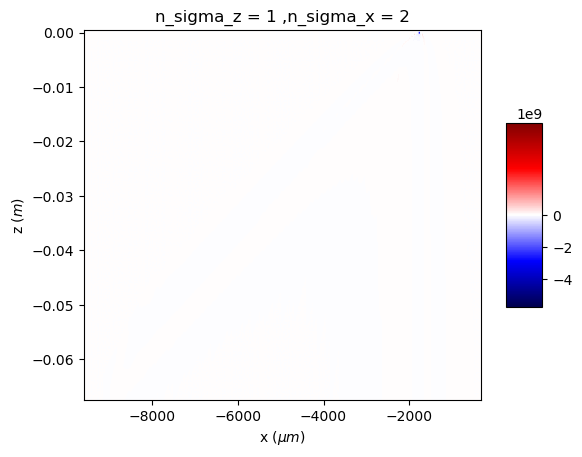

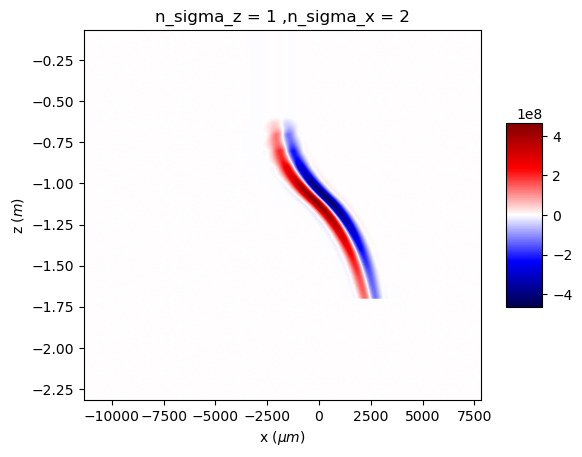

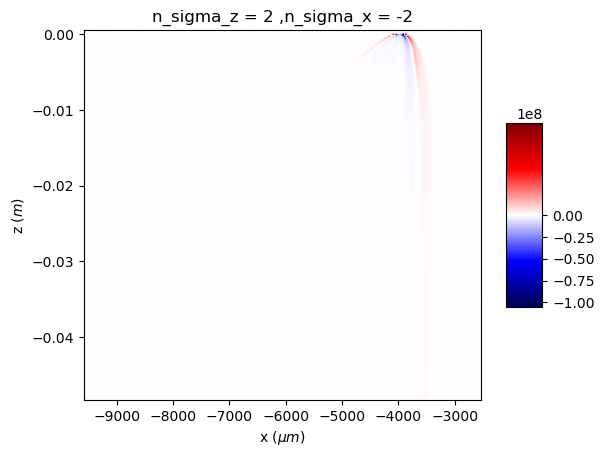

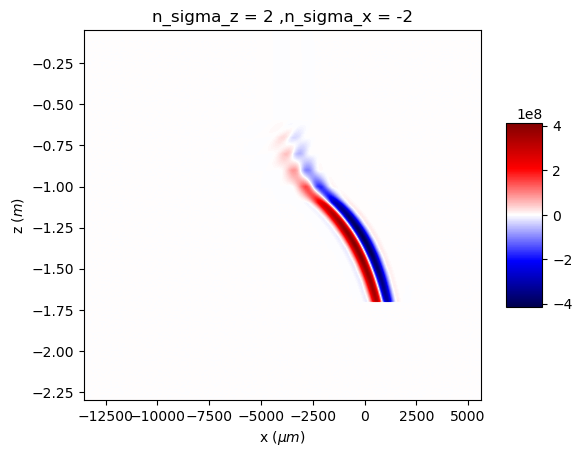

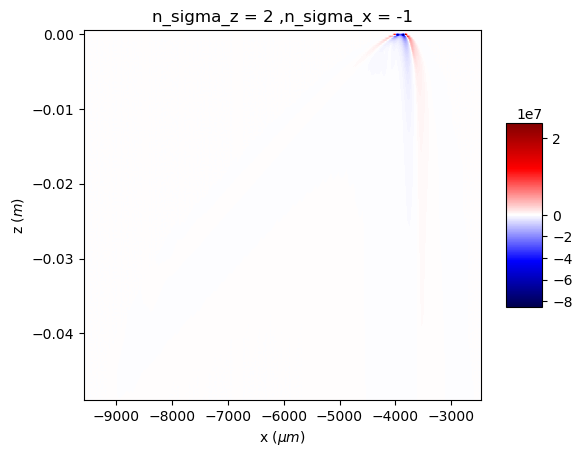

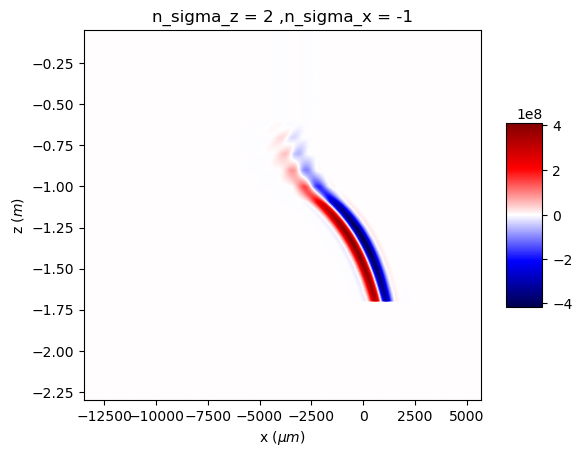

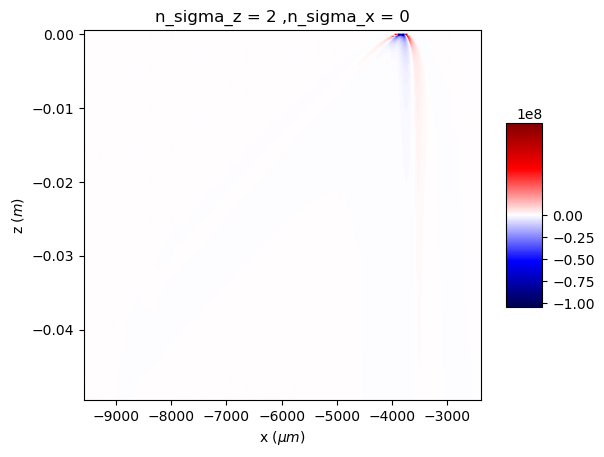

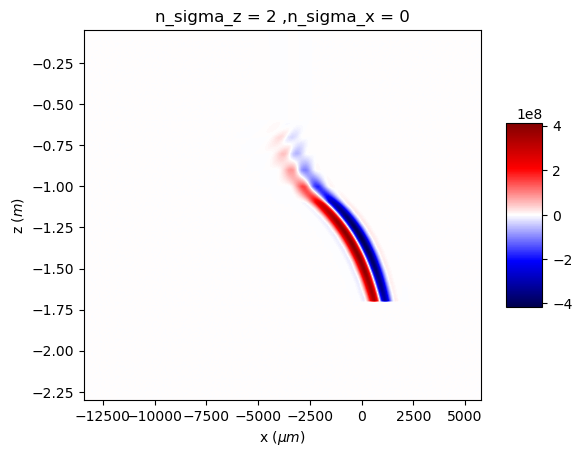

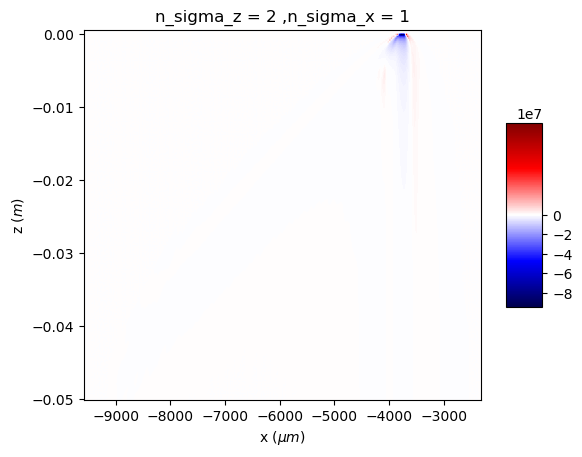

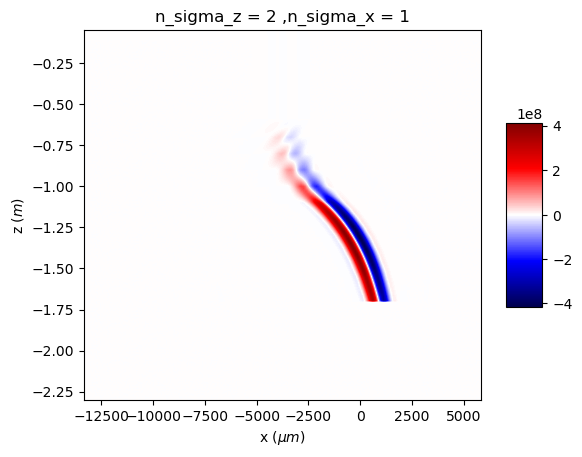

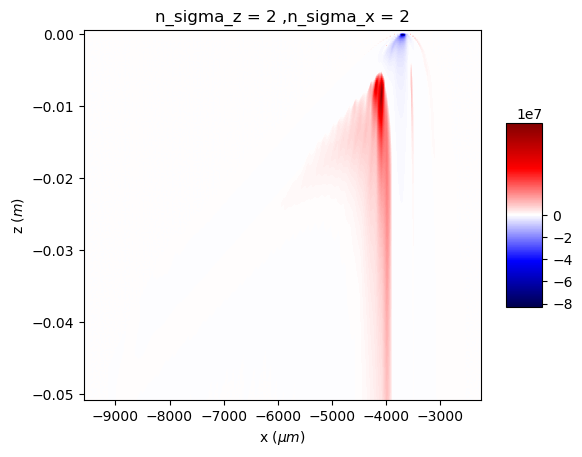

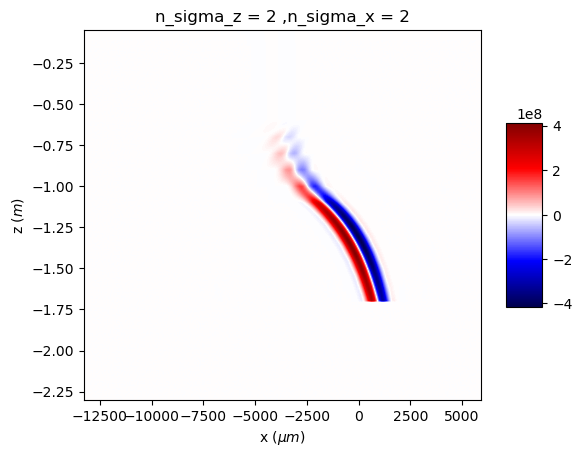

In [36]:
t = DtestCSR.beam.position
print(t)
for k in [-2,-1,0, 1,2]:
    s  = t + k*DtestCSR.beam.sigma_z
    for q in [-2, -1, 0, 1,2]:
        x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam._sigma_x_transform
        title = "n_sigma_z = " +  str(k) +  " ,n_sigma_x = " + str(q)
        
        tan_theta = DtestCSR.beam._slope[0]
        x0 = DtestCSR.beam._mean_x
        if np.abs(tan_theta) <= 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
            s1 = s - 50*DtestCSR.beam._sigma_z
            s2 = s + 3*DtestCSR.beam._sigma_z
            xmin = x - 5*DtestCSR.beam._sigma_x
            xmax = x + 5*DtestCSR.beam._sigma_x
        else:
            if tan_theta > 0:
                tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
                d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmax = x0 + 5*DtestCSR.beam._sigma_x
                xmin = x - 20*DtestCSR.beam._sigma_x_transform
        
            else:
                tan_alpha = 2*tan_theta/(1-tan_theta**2)
                d = -(x0 - x - 5*DtestCSR.beam._sigma_x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmin = x0 - 5*DtestCSR.beam._sigma_x
                xmax = x + 20*DtestCSR.beam._sigma_x_transform
        sp = np.linspace(s1, s2, 200)
        xp = np.linspace(xmin, xmax, 600)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

       
        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)

        #------------------------------
        s3 = np.max((0, s1 - 2*DtestCSR.formation_length))
        sp = np.linspace(s3, s1, 800)
        if np.abs(tan_theta) <= 1:
            xmin = x - 20*DtestCSR.beam._sigma_x
            xmax = x + 20*DtestCSR.beam._sigma_x
        
        else:
            xmin = x - 5*DtestCSR.beam._sigma_x
            xmax = x + 5*DtestCSR.beam._sigma_x
       
        xp = np.linspace(xmin, xmax, 800)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')


        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)
        

#### ?plot_2D_contour